# Projet LiChess

Projet de traitement des données LiChess réalisé par SENSENBRENNER Amaury (SDSC) & WEISS Nicolas (SDSC).

Il n'y a pas de rapport pour ce projet mais le notebook est assez bien annoté. Vous y trouverez toutes les informations nécessaires à la bonne compréhension du projet. Nous avons donc décidé d'utiliser Spark au lieu d'Hadoop pour ce projet.

# Accès fichier CSV

In [ ]:
%pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore
from colorama import Style
pd.set_option('display.max_columns', None)

In [ ]:
Data_chess = pd.read_csv("/content/Sept_20_analysis.csv")

In [ ]:
Data_chess.head()

,GAME,BlackElo,BlackRatingDiff,Date,ECO,Event,Opening,Result,Site,Termination,TimeControl,UTCTime,WhiteElo,WhiteRatingDiff,Black_elo_category,White_elo_category,starting_time,increment,Game_type,Total_moves,Black_blunders,White_blunders,Black_mistakes,White_mistakes,Black_inaccuracies,White_inaccuracies,Black_inferior_moves,White_inferior_moves,Black_ts_moves,White_ts_moves,Black_ts_blunders,White_ts_blunders,Black_ts_mistakes,White_ts_mistake,Black_long_moves,White_long_moves,Black_bad_long_moves,White_bad_long_moves,Game_flips,Game_flips_ts
0,11,1143,6.0,2020.09.01,A02,Rated Blitz game,Bird Opening,0-1,https://lichess.org/hjb8FYm1,Time forfeit,300+0,00:00:00,1180.0,-7.0,Low rating,Low rating,300.0,0.0,Blitz,66.0,4.0,2.0,0.0,3.0,3.0,1.0,7.0,6.0,8.0,8.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,8.0,0.0
1,14,1504,NaN,2020.09.01,A04,Rated Blitz game,Réti Opening,0-1,https://lichess.org/Iz2fbHuE,Normal,300+0,00:00:00,1381.0,NaN,Low rating,Low rating,300.0,0.0,Blitz,64.0,2.0,1.0,1.0,1.0,7.0,5.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0
2,29,1933,1.0,2020.09.01,C41,Rated Blitz game,Philidor Defense,0-1,https://lichess.org/Cdj7flmY,Time forfeit,300+2,00:00:00,1485.0,-1.0,High rating,Low rating,300.0,2.0,Blitz,70.0,0.0,1.0,1.0,2.0,8.0,8.0,9.0,11.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,0.0
3,40,1710,10.0,2020.09.01,B23,Rated Blitz game,Sicilian Defense: Closed,0-1,https://lichess.org/WZQ9FEpD,Normal,180+2,00:00:00,2040.0,-11.0,Low rating,High rating,180.0,2.0,Blitz,86.0,4.0,2.0,1.0,5.0,3.0,4.0,8.0,11.0,18.0,0.0,4.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,8.0,1.0
4,55,1598,-1.0,2020.09.01,B03,Rated Rapid game,Alekhine Defense,1-0,https://lichess.org/ESlJl57U,Normal,600+0,00:00:00,2163.0,0.0,Low rating,High rating,600.0,0.0,Rapid,71.0,1.0,0.0,1.0,1.0,6.0,2.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [ ]:
Data_chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13622 entries, 0 to 13621
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GAME                  13622 non-null  int64  
 1   BlackElo              13622 non-null  int64  
 2   BlackRatingDiff       13575 non-null  float64
 3   Date                  13622 non-null  object 
 4   ECO                   13622 non-null  object 
 5   Event                 13622 non-null  object 
 6   Opening               13622 non-null  object 
 7   Result                13621 non-null  object 
 8   Site                  13621 non-null  object 
 9   Termination           13621 non-null  object 
 10  TimeControl           13621 non-null  object 
 11  UTCTime               13621 non-null  object 
 12  WhiteElo              13621 non-null  float64
 13  WhiteRatingDiff       13574 non-null  float64
 14  Black_elo_category    13621 non-null  object 
 15  White_elo_category 

In [ ]:
Data_chess['Game_type'].unique()

array(['Blitz', 'Rapid', 'Bullet', 'Classical', 'Correspondence', nan],
      dtype=object)

In [ ]:
dfs = [Data_chess]
for df in dfs:
  print()
  for c in df.columns:
    wtf = ""
    nulls = df[c].isnull().sum()
    ratio = nulls/len(df)

    if ratio > 0:
      print(wtf + c + " : "  + str(nulls) + f" nulls, ratio : {Fore.RED}" + str(round(ratio*100,2)) + f"%{Style.RESET_ALL} de nulls")
    else:
      print(wtf + c + " : "  + str(nulls) + " nulls, ratio : " + str(round(ratio*100,2)) + "% de nulls")


GAME : 0 nulls, ratio : 0.0% de nulls
BlackElo : 0 nulls, ratio : 0.0% de nulls
BlackRatingDiff : 47 nulls, ratio : 0.35% de nulls
Date : 0 nulls, ratio : 0.0% de nulls
ECO : 0 nulls, ratio : 0.0% de nulls
Event : 0 nulls, ratio : 0.0% de nulls
Opening : 0 nulls, ratio : 0.0% de nulls
Result : 1 nulls, ratio : 0.01% de nulls
Site : 1 nulls, ratio : 0.01% de nulls
Termination : 1 nulls, ratio : 0.01% de nulls
TimeControl : 1 nulls, ratio : 0.01% de nulls
UTCTime : 1 nulls, ratio : 0.01% de nulls
WhiteElo : 1 nulls, ratio : 0.01% de nulls
WhiteRatingDiff : 48 nulls, ratio : 0.35% de nulls
Black_elo_category : 1 nulls, ratio : 0.01% de nulls
White_elo_category : 1 nulls, ratio : 0.01% de nulls
starting_time : 42 nulls, ratio : 0.31% de nulls
increment : 42 nulls, ratio : 0.31% de nulls
Game_type : 1 nulls, ratio : 0.01% de nulls
Total_moves : 1 nulls, ratio : 0.01% de nulls
Black_blunders : 1 nulls, ratio : 0.01% de nulls
White_blunders : 1 nulls, ratio : 0.01% de nulls
Black_mistakes : 

# System Setup for a Spark NoteBook

Le System Setup provient du cours et des exercices fournit par notre professeur, nous avons utilisé exactement les mêmes commandes.

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop2.tgz
!tar xf spark-3.3.1-bin-hadoop2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop2"


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.functions import corr
from pyspark.sql.functions import sum, avg, max
from pyspark.sql.functions import first
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import desc, asc
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

# Dataframe Setup

In [ ]:
df_spark = spark.read.option('header', 'true').csv("/content/Sept_20_analysis.csv")

In [ ]:
df_spark.show(5)

+----+--------+---------------+----------+---+----------------+--------------------+------+--------------------+------------+-----------+--------+--------+---------------+------------------+------------------+-------------+---------+---------+-----------+--------------+--------------+--------------+--------------+------------------+------------------+--------------------+--------------------+--------------+--------------+-----------------+-----------------+-----------------+----------------+----------------+----------------+--------------------+--------------------+----------+-------------+
|GAME|BlackElo|BlackRatingDiff|      Date|ECO|           Event|             Opening|Result|                Site| Termination|TimeControl| UTCTime|WhiteElo|WhiteRatingDiff|Black_elo_category|White_elo_category|starting_time|increment|Game_type|Total_moves|Black_blunders|White_blunders|Black_mistakes|White_mistakes|Black_inaccuracies|White_inaccuracies|Black_inferior_moves|White_inferior_moves|Black_t

je supprime dans un premier temps, après avoir lu correctemeent le sujet, des colonnes qui me semblent pas pertinentes pour le reste du projet.

In [ ]:
df_spark_2 = df_spark.drop('GAME','Date','Site', 'UTCTime')

In [ ]:
df_spark_2.show(5)

+--------+---------------+---+----------------+--------------------+------+------------+-----------+--------+---------------+------------------+------------------+-------------+---------+---------+-----------+--------------+--------------+--------------+--------------+------------------+------------------+--------------------+--------------------+--------------+--------------+-----------------+-----------------+-----------------+----------------+----------------+----------------+--------------------+--------------------+----------+-------------+
|BlackElo|BlackRatingDiff|ECO|           Event|             Opening|Result| Termination|TimeControl|WhiteElo|WhiteRatingDiff|Black_elo_category|White_elo_category|starting_time|increment|Game_type|Total_moves|Black_blunders|White_blunders|Black_mistakes|White_mistakes|Black_inaccuracies|White_inaccuracies|Black_inferior_moves|White_inferior_moves|Black_ts_moves|White_ts_moves|Black_ts_blunders|White_ts_blunders|Black_ts_mistakes|White_ts_mistak

# Définition des fonctions 

J'ai pris la peine de rajouter deux catégories ("joueur bas niveau" et "dieu des echecs") afin que toutes nos données soient traiter. Mais on aurait très bien pu ne pas les rajouter et supprimer les données non classées. Certains fonctions peuvent paraître inutilent mais elles ont été construites au fur et à mesure pour la continuité des questions. Nous ne les avons pas remodifiées par la suite.

In [ ]:
@udf("string")
def categorie_niveau_echec(x):
  if(x < 1200):
    return "joueur bas niveau"
  if(x >= 1200 and x <= 1499.5):
    return "joueur occasionnel"
  if(x >= 1500 and x <= 1799.5):
    return "bon joueur de club"  
  if(x >= 1800 and x <= 1999.5):
    return "tres bon joueur de club"
  if(x >= 2000 and x <= 2399.5):
    return "niveau national et international (MI)" 
  if(x >= 2400 and x <= 2800):
    return "GMI, Champions du monde"
  if(x > 2800):
    return "dieu des echecs" 
  else:
    return "erreur sur le classement"        


In [ ]:
@udf("string")
def result_all(x):
  if(x == "1-0"):
    return "Victoire_White"
  if(x == "0-1"):
    return "Victoire_Black"
  else:
    return "Draw or Undicided"    

In [ ]:
@udf("string")
def result_white(x):
  if(x == "1-0"):
    return "Victoire"
  if(x == "0-1"):
    return "Defaite"
  else:
    return "Draw or Undicided"    

In [ ]:
@udf("string")
def result_black(x):
  if(x == "1-0"):
    return "Defaite"
  if(x == "0-1"):
    return "Victoire"
  else:
    return "Draw or Undicided" 

On considère qu'un match null ou un résultat indécidable est comme une défaite. C'est vraiment un choix personnel pour classer ces données.

In [ ]:
@udf("integer")
def defaite_white(x):
  if(x == "Defaite"):
    return 1
  if(x == "Victoire"): 
    return 0
  if(x == "Draw or Undicided"):
    return 0 

In [ ]:
@udf("integer")
def defaite_black(x):
  if(x == "Defaite"):
    return 1
  if(x == "Victoire"): 
    return 0
  if(x == "Draw or Undicided"):
    return 0 

In [ ]:
@udf("integer")
def victoire_white(x):
  if(x == "Defaite"):
    return 0
  if(x == "Victoire"): 
    return 1
  if(x == "Draw or Undicided"):
    return 0   

In [ ]:
@udf("integer")
def victoire_black(x):
  if(x == "Defaite"):
    return 0
  if(x == "Victoire"): 
    return 1
  if(x == "Draw or Undicided"):
    return 0   

# Question 1

Quel est le taux de bourdes, d'erreur et d'imprécision par coup, par catégorie de niveau (*) et sur les parties de type Blitz (Le type Blitz est de loin le plus joué sur ces sites en ligne).

Colonne Bourdes -> Black_blunders + White_blunders

Colonne Erreur -> Black_mistakes + White_mistakes

Colonne Imprécision -> Black_inaccuracies + White_inaccuracies

**Black_inferior_moves**: Black_blunders + Black_mistakes + Black_inaccuracies

**White_inferior_moves**: White_blunders + White_mistakes + White_inaccuracies

Colonne catégorie de niveau (ELO) -> (BlackElo + WhiteElo) / 2 

Colonne type partie -> Game_type == Blitz

La première étape consiste à filtrer le dataframe pour uniquement avoir des parties de type Blitz.

In [ ]:
g1 = df_spark_2.filter(df_spark_2['Game_type'] == 'Blitz')

In [ ]:
g1.show(5)

+--------+---------------+---+--------------------+--------------------+------+------------+-----------+--------+---------------+------------------+------------------+-------------+---------+---------+-----------+--------------+--------------+--------------+--------------+------------------+------------------+--------------------+--------------------+--------------+--------------+-----------------+-----------------+-----------------+----------------+----------------+----------------+--------------------+--------------------+----------+-------------+
|BlackElo|BlackRatingDiff|ECO|               Event|             Opening|Result| Termination|TimeControl|WhiteElo|WhiteRatingDiff|Black_elo_category|White_elo_category|starting_time|increment|Game_type|Total_moves|Black_blunders|White_blunders|Black_mistakes|White_mistakes|Black_inaccuracies|White_inaccuracies|Black_inferior_moves|White_inferior_moves|Black_ts_moves|White_ts_moves|Black_ts_blunders|White_ts_blunders|Black_ts_mistakes|White_t

La Deuxième étape consiste à garder uniquement les colonnes qui vont nous permettre de répondre à la question.

In [ ]:
g2 = g1[['BlackElo', 'WhiteElo', 'Black_blunders', 'White_blunders', 'Black_mistakes', 'White_mistakes', 'Black_inaccuracies', 'White_inaccuracies', 'Total_moves']]

In [ ]:
g2.show(5)

+--------+--------+--------------+--------------+--------------+--------------+------------------+------------------+-----------+
|BlackElo|WhiteElo|Black_blunders|White_blunders|Black_mistakes|White_mistakes|Black_inaccuracies|White_inaccuracies|Total_moves|
+--------+--------+--------------+--------------+--------------+--------------+------------------+------------------+-----------+
|    1143|    1180|             4|             2|             0|             3|                 3|                 1|         66|
|    1504|    1381|             2|             1|             1|             1|                 7|                 5|         64|
|    1933|    1485|             0|             1|             1|             2|                 8|                 8|         70|
|    1710|    2040|             4|             2|             1|             5|                 3|                 4|         86|
|     942|    1088|             7|             3|             4|             2|           

La troisième étape consiste à calculer les 3 taux + Elo moyen de la partie.

In [ ]:
g3 = g2.withColumn('Taux_blunders', ((g2['Black_blunders'] + g2['White_blunders']) / g2['Total_moves']) * 100)

In [ ]:
g3.show(5)

+--------+--------+--------------+--------------+--------------+--------------+------------------+------------------+-----------+------------------+
|BlackElo|WhiteElo|Black_blunders|White_blunders|Black_mistakes|White_mistakes|Black_inaccuracies|White_inaccuracies|Total_moves|     Taux_blunders|
+--------+--------+--------------+--------------+--------------+--------------+------------------+------------------+-----------+------------------+
|    1143|    1180|             4|             2|             0|             3|                 3|                 1|         66| 9.090909090909092|
|    1504|    1381|             2|             1|             1|             1|                 7|                 5|         64|            4.6875|
|    1933|    1485|             0|             1|             1|             2|                 8|                 8|         70|1.4285714285714286|
|    1710|    2040|             4|             2|             1|             5|                 3|        

In [ ]:
g4 = g3.withColumn('Taux_mistakes', ((g3['Black_mistakes'] + g3['White_mistakes']) / g3['Total_moves']) * 100)

In [ ]:
g4.show(5)

+--------+--------+--------------+--------------+--------------+--------------+------------------+------------------+-----------+------------------+-----------------+
|BlackElo|WhiteElo|Black_blunders|White_blunders|Black_mistakes|White_mistakes|Black_inaccuracies|White_inaccuracies|Total_moves|     Taux_blunders|    Taux_mistakes|
+--------+--------+--------------+--------------+--------------+--------------+------------------+------------------+-----------+------------------+-----------------+
|    1143|    1180|             4|             2|             0|             3|                 3|                 1|         66| 9.090909090909092|4.545454545454546|
|    1504|    1381|             2|             1|             1|             1|                 7|                 5|         64|            4.6875|            3.125|
|    1933|    1485|             0|             1|             1|             2|                 8|                 8|         70|1.4285714285714286|4.285714285714286

In [ ]:
g5 = g4.withColumn('Taux_inaccuracies', ((g4['Black_inaccuracies'] + g4['White_inaccuracies']) / g4['Total_moves']) * 100)

In [ ]:
g5.show(5)

+--------+--------+--------------+--------------+--------------+--------------+------------------+------------------+-----------+------------------+-----------------+------------------+
|BlackElo|WhiteElo|Black_blunders|White_blunders|Black_mistakes|White_mistakes|Black_inaccuracies|White_inaccuracies|Total_moves|     Taux_blunders|    Taux_mistakes| Taux_inaccuracies|
+--------+--------+--------------+--------------+--------------+--------------+------------------+------------------+-----------+------------------+-----------------+------------------+
|    1143|    1180|             4|             2|             0|             3|                 3|                 1|         66| 9.090909090909092|4.545454545454546|6.0606060606060606|
|    1504|    1381|             2|             1|             1|             1|                 7|                 5|         64|            4.6875|            3.125|             18.75|
|    1933|    1485|             0|             1|             1|      

In [ ]:
g6 = g5.withColumn('Elo_moyen', (g5['WhiteElo'] + g5['BlackElo']) / 2)

In [ ]:
g6.show(5)

+--------+--------+--------------+--------------+--------------+--------------+------------------+------------------+-----------+------------------+-----------------+------------------+---------+
|BlackElo|WhiteElo|Black_blunders|White_blunders|Black_mistakes|White_mistakes|Black_inaccuracies|White_inaccuracies|Total_moves|     Taux_blunders|    Taux_mistakes| Taux_inaccuracies|Elo_moyen|
+--------+--------+--------------+--------------+--------------+--------------+------------------+------------------+-----------+------------------+-----------------+------------------+---------+
|    1143|    1180|             4|             2|             0|             3|                 3|                 1|         66| 9.090909090909092|4.545454545454546|6.0606060606060606|   1161.5|
|    1504|    1381|             2|             1|             1|             1|                 7|                 5|         64|            4.6875|            3.125|             18.75|   1442.5|
|    1933|    1485| 

On va supprimer les colonnes qui ne sont servent plus à rien maintenant et faire des catégories en fonctions de l'élo moyen de la partie.

In [ ]:
g7 = g6.drop('BlackElo','WhiteElo','Black_blunders', 'White_blunders', 'Black_mistakes', 'White_mistakes', 'Black_inaccuracies', 'White_inaccuracies', 'Total_moves')

In [ ]:
g7.show(5)

+------------------+-----------------+------------------+---------+
|     Taux_blunders|    Taux_mistakes| Taux_inaccuracies|Elo_moyen|
+------------------+-----------------+------------------+---------+
| 9.090909090909092|4.545454545454546|6.0606060606060606|   1161.5|
|            4.6875|            3.125|             18.75|   1442.5|
|1.4285714285714286|4.285714285714286|22.857142857142858|   1709.0|
| 6.976744186046512|6.976744186046512|  8.13953488372093|   1875.0|
|14.492753623188406|8.695652173913043|11.594202898550725|   1015.0|
+------------------+-----------------+------------------+---------+
only showing top 5 rows



In [ ]:
g8 = g7.withColumn('Categorie_niveau', categorie_niveau_echec(g7['Elo_moyen']))

In [ ]:
g8.show(5)

+------------------+-----------------+------------------+---------+--------------------+
|     Taux_blunders|    Taux_mistakes| Taux_inaccuracies|Elo_moyen|    Categorie_niveau|
+------------------+-----------------+------------------+---------+--------------------+
| 9.090909090909092|4.545454545454546|6.0606060606060606|   1161.5|   joueur bas niveau|
|            4.6875|            3.125|             18.75|   1442.5|  joueur occasionnel|
|1.4285714285714286|4.285714285714286|22.857142857142858|   1709.0|  bon joueur de club|
| 6.976744186046512|6.976744186046512|  8.13953488372093|   1875.0|tres bon joueur d...|
|14.492753623188406|8.695652173913043|11.594202898550725|   1015.0|   joueur bas niveau|
+------------------+-----------------+------------------+---------+--------------------+
only showing top 5 rows



In [ ]:
g9 = g8.drop('Elo_moyen')

In [ ]:
g9.show(5)

+------------------+-----------------+------------------+--------------------+
|     Taux_blunders|    Taux_mistakes| Taux_inaccuracies|    Categorie_niveau|
+------------------+-----------------+------------------+--------------------+
| 9.090909090909092|4.545454545454546|6.0606060606060606|   joueur bas niveau|
|            4.6875|            3.125|             18.75|  joueur occasionnel|
|1.4285714285714286|4.285714285714286|22.857142857142858|  bon joueur de club|
| 6.976744186046512|6.976744186046512|  8.13953488372093|tres bon joueur d...|
|14.492753623188406|8.695652173913043|11.594202898550725|   joueur bas niveau|
+------------------+-----------------+------------------+--------------------+
only showing top 5 rows



In [ ]:
g10 = g9[['Categorie_niveau', 'Taux_blunders', 'Taux_mistakes', 'Taux_inaccuracies']]

In [ ]:
g10.show()

+--------------------+------------------+------------------+------------------+
|    Categorie_niveau|     Taux_blunders|     Taux_mistakes| Taux_inaccuracies|
+--------------------+------------------+------------------+------------------+
|   joueur bas niveau| 9.090909090909092| 4.545454545454546|6.0606060606060606|
|  joueur occasionnel|            4.6875|             3.125|             18.75|
|  bon joueur de club|1.4285714285714286| 4.285714285714286|22.857142857142858|
|tres bon joueur d...| 6.976744186046512| 6.976744186046512|  8.13953488372093|
|   joueur bas niveau|14.492753623188406| 8.695652173913043|11.594202898550725|
|  bon joueur de club|3.8461538461538463|1.9230769230769231|1.9230769230769231|
|  joueur occasionnel|10.256410256410255|7.6923076923076925|10.256410256410255|
|tres bon joueur d...| 4.878048780487805|14.634146341463413|14.634146341463413|
|  joueur occasionnel| 8.064516129032258|17.741935483870968| 8.064516129032258|
|   joueur bas niveau| 7.042253521126761

On va maintenant utiliser l'outil de sélection groupBy pour faire des groupes en fonction de la catégorie de niveau des joueurs et les triers dans l'ordre croissant.

In [ ]:
g11 = g10.groupBy('Categorie_niveau').agg(avg("Taux_blunders").alias('average_blunders'), avg("Taux_mistakes").alias('average_mistake'), avg("Taux_inaccuracies").alias('average_inaccuracies')).sort("average_blunders")

In [ ]:
g11.show()

+--------------------+------------------+------------------+--------------------+
|    Categorie_niveau|  average_blunders|   average_mistake|average_inaccuracies|
+--------------------+------------------+------------------+--------------------+
|GMI, Champions du...|3.3328537923231516| 6.403400822673126|   7.505710478237151|
|niveau national e...| 4.204851838113148| 8.161926845055666|   8.659734554321089|
|tres bon joueur d...| 5.016695350863965|  9.22021888950748|   9.231693665935564|
|  bon joueur de club| 6.004901448458435| 10.08704698129138|   9.451713055395189|
|  joueur occasionnel| 7.461456640618594|10.692521004402263|   9.435107460980044|
|   joueur bas niveau|  9.56869699189759| 11.16183648109092|   9.464626860774594|
+--------------------+------------------+------------------+--------------------+



# Question 2

Quelle est la corrélation entre le nombre d'erreurs et résultat (victoire/défaite). Attention: vous prendrez soin d'expliquer votre raisonnement pour analyser une telle corrélation et les variables que vous prenez en compte, les seules variables nombre d'erreurs pour une couleur et résultat pour cette couleur n'étant probablement pas corrélées.

Dans cette question, nous avons compris que le nombre d'erreurs provenait de la colonne "Black_mistakes" et de la colonne "White_mistakes". Je pense aussi qu'on peut comprendre la question autrement, c'est à dire, en utilisant la colonne "Black_inferior_moves" et "White_inferior_moves". Nous avons utilisé la première version dans notre cas.

Il est important de noter qu'une corrélation n'implique pas forcément de causalité, et il est possible que la corrélation entre le nombre d'erreurs des pièces blanches ou noirs et le résultat soit le résultat d'une troisième variable non prise en compte dans l'analyse. Par conséquent, il est important d'être prudent lors de l'interprétation des résultats et de considérer d'autres facteurs qui peuvent influencer la relation entre les deux variables.

Dans ce contexte, il est important de ne pas garder la colonne "Result" en tant que telle. Il faut garder un rapport victoire/défaite en pourcentage. Avec cela, on pourra donc trouver une corrélation avec le nombre d'erreurs.


Lorsque les pions blancs gagnent la partie, nous allons nous intéresser au taux d'erreur des pions noirs. Lorsque les pions noirs gagnent la partie, nous allons nous intéresser au taux d'erreur des pions blancs.

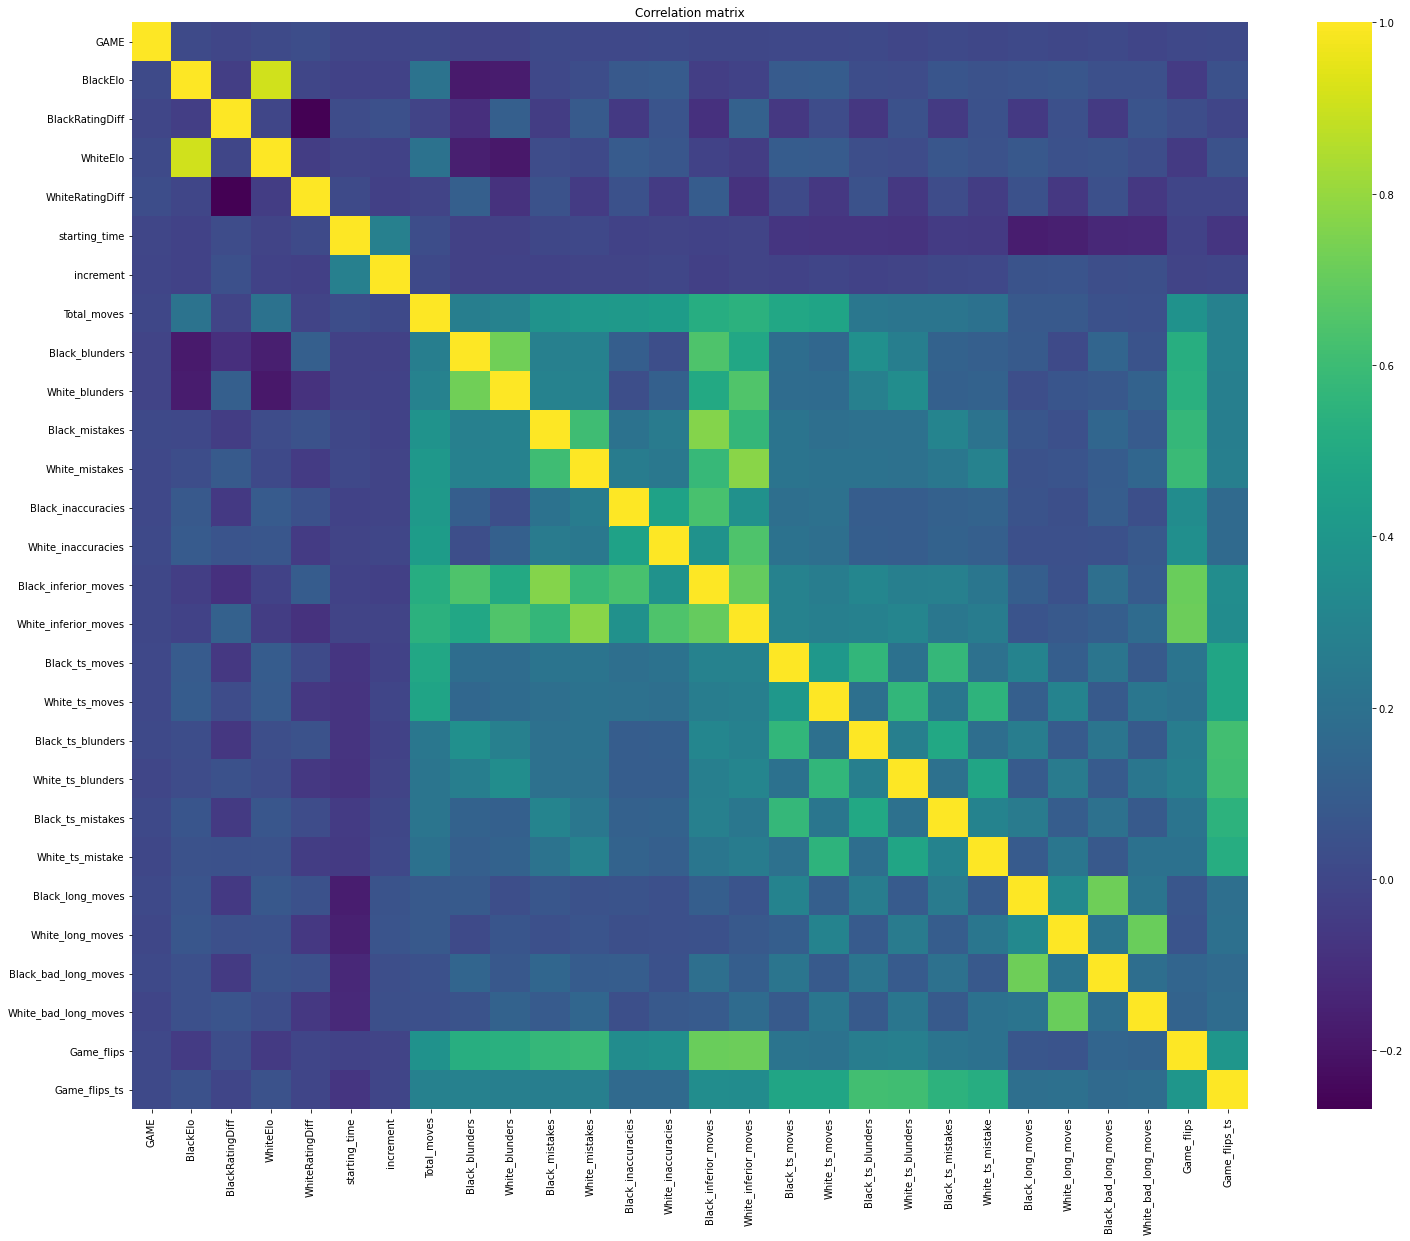

In [ ]:
Data_chess_corr = Data_chess.corr()
fig, axs = plt.subplots(figsize=(25,20))
sns.heatmap(Data_chess_corr,ax=axs,cmap=sns.color_palette("viridis", as_cmap=True))
plt.title("Correlation matrix")
# plt.savefig("maxtrix_corr.png", transparent = False)
plt.show()

In [ ]:
df_spark_2.show(5)

+--------+---------------+---+----------------+--------------------+------+------------+-----------+--------+---------------+------------------+------------------+-------------+---------+---------+-----------+--------------+--------------+--------------+--------------+------------------+------------------+--------------------+--------------------+--------------+--------------+-----------------+-----------------+-----------------+----------------+----------------+----------------+--------------------+--------------------+----------+-------------+
|BlackElo|BlackRatingDiff|ECO|           Event|             Opening|Result| Termination|TimeControl|WhiteElo|WhiteRatingDiff|Black_elo_category|White_elo_category|starting_time|increment|Game_type|Total_moves|Black_blunders|White_blunders|Black_mistakes|White_mistakes|Black_inaccuracies|White_inaccuracies|Black_inferior_moves|White_inferior_moves|Black_ts_moves|White_ts_moves|Black_ts_blunders|White_ts_blunders|Black_ts_mistakes|White_ts_mistak

In [ ]:
t0 = df_spark_2[['Result', 'Total_moves', 'Black_mistakes', 'White_mistakes']]

In [ ]:
t1 = t0.withColumn('Result_bis', result_all(t0['Result']))

In [ ]:
t2 = t1.drop('Result')

In [ ]:
t2.show(5)

+-----------+--------------+--------------+--------------+
|Total_moves|Black_mistakes|White_mistakes|    Result_bis|
+-----------+--------------+--------------+--------------+
|         66|             0|             3|Victoire_Black|
|         64|             1|             1|Victoire_Black|
|         70|             1|             2|Victoire_Black|
|         86|             1|             5|Victoire_Black|
|         71|             1|             1|Victoire_White|
+-----------+--------------+--------------+--------------+
only showing top 5 rows



In [ ]:
t3 = t2[['Result_bis', 'Total_moves', 'Black_mistakes', 'White_mistakes']]

In [ ]:
t3.show(5)

+--------------+-----------+--------------+--------------+
|    Result_bis|Total_moves|Black_mistakes|White_mistakes|
+--------------+-----------+--------------+--------------+
|Victoire_Black|         66|             0|             3|
|Victoire_Black|         64|             1|             1|
|Victoire_Black|         70|             1|             2|
|Victoire_Black|         86|             1|             5|
|Victoire_White|         71|             1|             1|
+--------------+-----------+--------------+--------------+
only showing top 5 rows



In [ ]:
t4 = t3.groupBy('Result_bis').agg(avg("White_mistakes").alias('Average_White_mistakes'), avg("Black_mistakes").alias('Average_Black_mistakes'), avg("Total_moves").alias('Average_Total_moves'))

In [ ]:
t4.show(5)

+-----------------+----------------------+----------------------+-------------------+
|       Result_bis|Average_White_mistakes|Average_Black_mistakes|Average_Total_moves|
+-----------------+----------------------+----------------------+-------------------+
|   Victoire_Black|    3.4026264919763123|    2.8100702647970297| 63.381424319597436|
|   Victoire_White|     2.752650694159686|    3.2977271395934626|   62.0067658602308|
|Draw or Undicided|     4.031202818319074|     3.948666331152491| 104.06139909411172|
+-----------------+----------------------+----------------------+-------------------+



On peut donc observer la corrélation suivante :
- Lorsque le taux moyen d'erreurs des noirs est supérieur au taux d'erreur moyen des blancs, les blancs gagnent en général la partie.
- Lorsque le taux moyen d'erreurs des blancs est supérieur au taux d'erreur moyen des noirs, les noirs gagnent en général la partie.
- Lorsque le taux moyen d'erreurs des blancs est a peu près égal au taux d'erreur moyen des noirs, la partie se finit généralement sur un match null.

Dans la suite, j'essaye une autre approche. Je ne pense pas que l'approche ci-dessous soit concluante mais je la laisse pour preuve de recherche.

In [ ]:
tt1 = t3.filter(t3['Result_bis']=='Victoire_Black').select('Result_bis','Total_moves','White_mistakes')

In [ ]:
tt2 = t3.filter(t3['Result_bis']=='Victoire_White').select('Result_bis','Total_moves','Black_mistakes')

In [ ]:
tt3 = tt1.union(tt2)

In [ ]:
tt3.show(5)

+--------------+-----------+--------------+
|    Result_bis|Total_moves|White_mistakes|
+--------------+-----------+--------------+
|Victoire_Black|         66|             3|
|Victoire_Black|         64|             1|
|Victoire_Black|         70|             2|
|Victoire_Black|         86|             5|
|Victoire_Black|         73|             5|
+--------------+-----------+--------------+
only showing top 5 rows



In [ ]:
tt3 = tt3.withColumnRenamed('White_mistakes','Mistakes_perdants')

In [ ]:
tt3.show(5)

+--------------+-----------+-----------------+
|    Result_bis|Total_moves|Mistakes_perdants|
+--------------+-----------+-----------------+
|Victoire_Black|         66|                3|
|Victoire_Black|         64|                1|
|Victoire_Black|         70|                2|
|Victoire_Black|         86|                5|
|Victoire_Black|         73|                5|
+--------------+-----------+-----------------+
only showing top 5 rows



In [ ]:
tt3 = tt3.withColumn("Mistakes_perdants", tt3["Mistakes_perdants"].cast(IntegerType()))

In [ ]:
tt3 = tt3.withColumn("Total_moves", tt3["Total_moves"].cast(IntegerType()))

In [ ]:
tt3.show(5)

+--------------+-----------+-----------------+
|    Result_bis|Total_moves|Mistakes_perdants|
+--------------+-----------+-----------------+
|Victoire_Black|         66|                3|
|Victoire_Black|         64|                1|
|Victoire_Black|         70|                2|
|Victoire_Black|         86|                5|
|Victoire_Black|         73|                5|
+--------------+-----------+-----------------+
only showing top 5 rows



In [ ]:
tt4_corr = tt3.groupBy().sum('Mistakes_perdants','Total_moves').collect()[0]

In [ ]:
print((tt4_corr[0]/tt4_corr[1] * 100))

5.343105014250368


Le taux moyen d'erreurs chez une personne qui a perdu la partie est de 5% par coup joué dans la partie. En général, une personne qui perd la partie possède un taux d'erreur moyen plus élevé que la personne qui gagne la partie. Nous avons vu cela ci-dessus.

# Question 3a

Avec quelle ouverture les blancs ont ils le plus de chance de gagner, par catégorie de niveau (*) et par type de partie (Blitz, Rapide, Classique).

Colonne Résultat -> Result

Colonne Opening -> Opening 

Colonne Type de partie -> Game_type

Colonne ECO -> ECO

Colonne catégorie de niveau (ELO) -> (BlackElo + WhiteElo) / 2 

Dans un premier temps, nous allons uniquement garder les colonnes utiles

In [ ]:
df_spark_2.show(5)

+--------+---------------+---+----------------+--------------------+------+------------+-----------+--------+---------------+------------------+------------------+-------------+---------+---------+-----------+--------------+--------------+--------------+--------------+------------------+------------------+--------------------+--------------------+--------------+--------------+-----------------+-----------------+-----------------+----------------+----------------+----------------+--------------------+--------------------+----------+-------------+
|BlackElo|BlackRatingDiff|ECO|           Event|             Opening|Result| Termination|TimeControl|WhiteElo|WhiteRatingDiff|Black_elo_category|White_elo_category|starting_time|increment|Game_type|Total_moves|Black_blunders|White_blunders|Black_mistakes|White_mistakes|Black_inaccuracies|White_inaccuracies|Black_inferior_moves|White_inferior_moves|Black_ts_moves|White_ts_moves|Black_ts_blunders|White_ts_blunders|Black_ts_mistakes|White_ts_mistak

In [ ]:
h0 = df_spark_2[['Game_type', 'ECO', 'Opening', 'BlackElo', 'WhiteElo', 'Result']]

In [ ]:
h0.show(5)

+---------+---+--------------------+--------+--------+------+
|Game_type|ECO|             Opening|BlackElo|WhiteElo|Result|
+---------+---+--------------------+--------+--------+------+
|    Blitz|A02|        Bird Opening|    1143|    1180|   0-1|
|    Blitz|A04|        Réti Opening|    1504|    1381|   0-1|
|    Blitz|C41|    Philidor Defense|    1933|    1485|   0-1|
|    Blitz|B23|Sicilian Defense:...|    1710|    2040|   0-1|
|    Rapid|B03|    Alekhine Defense|    1598|    2163|   1-0|
+---------+---+--------------------+--------+--------+------+
only showing top 5 rows



On va juste filtrer les types de parties pour correspondre au mieux à la question posé pour le type de partie, c'est à dire :(Blitz, Rapide, Classique)

In [ ]:
h1 = h0.filter((h0['Game_type'] == 'Blitz') | (h0['Game_type'] == 'Rapid') | (h0['Game_type'] == 'Classical'))

In [ ]:
h1.show(5)

+---------+---+--------------------+--------+--------+------+
|Game_type|ECO|             Opening|BlackElo|WhiteElo|Result|
+---------+---+--------------------+--------+--------+------+
|    Blitz|A02|        Bird Opening|    1143|    1180|   0-1|
|    Blitz|A04|        Réti Opening|    1504|    1381|   0-1|
|    Blitz|C41|    Philidor Defense|    1933|    1485|   0-1|
|    Blitz|B23|Sicilian Defense:...|    1710|    2040|   0-1|
|    Rapid|B03|    Alekhine Defense|    1598|    2163|   1-0|
+---------+---+--------------------+--------+--------+------+
only showing top 5 rows



Comme on va s'intéresser uniquement aux victoires défaites des blancs, on va transformer la colonne résultat en victoire ou défaite.

In [ ]:
h2 = h1.withColumn('Victoire/Défaite', result_white(h1['Result']))

In [ ]:
h2.show(5)

+---------+---+--------------------+--------+--------+------+----------------+
|Game_type|ECO|             Opening|BlackElo|WhiteElo|Result|Victoire/Défaite|
+---------+---+--------------------+--------+--------+------+----------------+
|    Blitz|A02|        Bird Opening|    1143|    1180|   0-1|         Defaite|
|    Blitz|A04|        Réti Opening|    1504|    1381|   0-1|         Defaite|
|    Blitz|C41|    Philidor Defense|    1933|    1485|   0-1|         Defaite|
|    Blitz|B23|Sicilian Defense:...|    1710|    2040|   0-1|         Defaite|
|    Rapid|B03|    Alekhine Defense|    1598|    2163|   1-0|        Victoire|
+---------+---+--------------------+--------+--------+------+----------------+
only showing top 5 rows



In [ ]:
h3 = h2.drop('Result')

In [ ]:
h3.show(5)

+---------+---+--------------------+--------+--------+----------------+
|Game_type|ECO|             Opening|BlackElo|WhiteElo|Victoire/Défaite|
+---------+---+--------------------+--------+--------+----------------+
|    Blitz|A02|        Bird Opening|    1143|    1180|         Defaite|
|    Blitz|A04|        Réti Opening|    1504|    1381|         Defaite|
|    Blitz|C41|    Philidor Defense|    1933|    1485|         Defaite|
|    Blitz|B23|Sicilian Defense:...|    1710|    2040|         Defaite|
|    Rapid|B03|    Alekhine Defense|    1598|    2163|        Victoire|
+---------+---+--------------------+--------+--------+----------------+
only showing top 5 rows



In [ ]:
h4 = h3.withColumn('Elo_moyen', (h3['WhiteElo'] + h3['BlackElo']) / 2)

In [ ]:
h4.show(5)

+---------+---+--------------------+--------+--------+----------------+---------+
|Game_type|ECO|             Opening|BlackElo|WhiteElo|Victoire/Défaite|Elo_moyen|
+---------+---+--------------------+--------+--------+----------------+---------+
|    Blitz|A02|        Bird Opening|    1143|    1180|         Defaite|   1161.5|
|    Blitz|A04|        Réti Opening|    1504|    1381|         Defaite|   1442.5|
|    Blitz|C41|    Philidor Defense|    1933|    1485|         Defaite|   1709.0|
|    Blitz|B23|Sicilian Defense:...|    1710|    2040|         Defaite|   1875.0|
|    Rapid|B03|    Alekhine Defense|    1598|    2163|        Victoire|   1880.5|
+---------+---+--------------------+--------+--------+----------------+---------+
only showing top 5 rows



In [ ]:
h5 = h4.withColumn('Categorie_niveau', categorie_niveau_echec(h4['Elo_moyen']))

In [ ]:
h5.show(5)

+---------+---+--------------------+--------+--------+----------------+---------+--------------------+
|Game_type|ECO|             Opening|BlackElo|WhiteElo|Victoire/Défaite|Elo_moyen|    Categorie_niveau|
+---------+---+--------------------+--------+--------+----------------+---------+--------------------+
|    Blitz|A02|        Bird Opening|    1143|    1180|         Defaite|   1161.5|   joueur bas niveau|
|    Blitz|A04|        Réti Opening|    1504|    1381|         Defaite|   1442.5|  joueur occasionnel|
|    Blitz|C41|    Philidor Defense|    1933|    1485|         Defaite|   1709.0|  bon joueur de club|
|    Blitz|B23|Sicilian Defense:...|    1710|    2040|         Defaite|   1875.0|tres bon joueur d...|
|    Rapid|B03|    Alekhine Defense|    1598|    2163|        Victoire|   1880.5|tres bon joueur d...|
+---------+---+--------------------+--------+--------+----------------+---------+--------------------+
only showing top 5 rows



In [ ]:
h6 = h5.drop('Elo_moyen', 'BlackElo', 'WhiteElo')

In [ ]:
h6.show(5)

+---------+---+--------------------+----------------+--------------------+
|Game_type|ECO|             Opening|Victoire/Défaite|    Categorie_niveau|
+---------+---+--------------------+----------------+--------------------+
|    Blitz|A02|        Bird Opening|         Defaite|   joueur bas niveau|
|    Blitz|A04|        Réti Opening|         Defaite|  joueur occasionnel|
|    Blitz|C41|    Philidor Defense|         Defaite|  bon joueur de club|
|    Blitz|B23|Sicilian Defense:...|         Defaite|tres bon joueur d...|
|    Rapid|B03|    Alekhine Defense|        Victoire|tres bon joueur d...|
+---------+---+--------------------+----------------+--------------------+
only showing top 5 rows



On va répondre à la première partie de la question qui est : Avec quelle ouverture les blancs ont ils le plus de chance de gagner ?

Je vais créer une fonction afin de pouvoir séparer la colonne victoire et défaite en deux colonnes distinctes.

In [ ]:
h7 = h6[['Opening', 'Victoire/Défaite']]

In [ ]:
h7.show(5)

+--------------------+----------------+
|             Opening|Victoire/Défaite|
+--------------------+----------------+
|        Bird Opening|         Defaite|
|        Réti Opening|         Defaite|
|    Philidor Defense|         Defaite|
|Sicilian Defense:...|         Defaite|
|    Alekhine Defense|        Victoire|
+--------------------+----------------+
only showing top 5 rows



In [ ]:
h8 = h7.withColumn('Victoire', victoire_white(h7['Victoire/Défaite']))

In [ ]:
h8.show(5)

+--------------------+----------------+--------+
|             Opening|Victoire/Défaite|Victoire|
+--------------------+----------------+--------+
|        Bird Opening|         Defaite|       0|
|        Réti Opening|         Defaite|       0|
|    Philidor Defense|         Defaite|       0|
|Sicilian Defense:...|         Defaite|       0|
|    Alekhine Defense|        Victoire|       1|
+--------------------+----------------+--------+
only showing top 5 rows



In [ ]:
h9 = h8.withColumn('Defaite', defaite_white(h8['Victoire/Défaite']))

In [ ]:
h9.show(5)

+--------------------+----------------+--------+-------+
|             Opening|Victoire/Défaite|Victoire|Defaite|
+--------------------+----------------+--------+-------+
|        Bird Opening|         Defaite|       0|      1|
|        Réti Opening|         Defaite|       0|      1|
|    Philidor Defense|         Defaite|       0|      1|
|Sicilian Defense:...|         Defaite|       0|      1|
|    Alekhine Defense|        Victoire|       1|      0|
+--------------------+----------------+--------+-------+
only showing top 5 rows



In [ ]:
h10 = h9.drop('Victoire/Défaite')

In [ ]:
h10.show(5)

+--------------------+--------+-------+
|             Opening|Victoire|Defaite|
+--------------------+--------+-------+
|        Bird Opening|       0|      1|
|        Réti Opening|       0|      1|
|    Philidor Defense|       0|      1|
|Sicilian Defense:...|       0|      1|
|    Alekhine Defense|       1|      0|
+--------------------+--------+-------+
only showing top 5 rows



In [ ]:
h11 = h10.groupBy('Opening').agg(sum("Victoire").alias('Somme_victoire'), sum("Defaite").alias('Somme_defaite')).sort("Somme_victoire", ascending = False)

In [ ]:
h11.show(5)

+--------------------+--------------+-------------+
|             Opening|Somme_victoire|Somme_defaite|
+--------------------+--------------+-------------+
|Queen's Pawn Game...|           652|          502|
|    Philidor Defense|           621|          346|
|Scandinavian Defe...|           400|          297|
|    Sicilian Defense|           375|          461|
|         Scotch Game|           358|          250|
+--------------------+--------------+-------------+
only showing top 5 rows



In [ ]:
h12 = h11.withColumn('Taux_victoire', h11['Somme_victoire'] / ( h11['Somme_victoire'] + h11['Somme_defaite'] ) * 100 )

In [ ]:
h12.sort("Taux_victoire", ascending = False).show(5)

+--------------------+--------------+-------------+-------------+
|             Opening|Somme_victoire|Somme_defaite|Taux_victoire|
+--------------------+--------------+-------------+-------------+
|Sicilian Defense:...|             1|            0|        100.0|
|Sicilian Defense:...|             2|            0|        100.0|
|Ruy Lopez: Morphy...|             1|            0|        100.0|
|Slav Defense: Exc...|             2|            0|        100.0|
|Van Geet Opening:...|             1|            0|        100.0|
+--------------------+--------------+-------------+-------------+
only showing top 5 rows



In [ ]:
h12.sort("Taux_victoire", ascending = True).show(5)

+--------------------+--------------+-------------+-------------+
|             Opening|Somme_victoire|Somme_defaite|Taux_victoire|
+--------------------+--------------+-------------+-------------+
|Alekhine Defense:...|             0|            0|         null|
|Ruy Lopez: Classi...|             0|            0|         null|
|Ruy Lopez: Exchan...|             0|            0|         null|
|Vienna Game: Stan...|             0|            0|         null|
|Ruy Lopez: Steini...|             0|            0|         null|
+--------------------+--------------+-------------+-------------+
only showing top 5 rows



In [ ]:
h12.show(5)

+--------------------+--------------+-------------+------------------+
|             Opening|Somme_victoire|Somme_defaite|     Taux_victoire|
+--------------------+--------------+-------------+------------------+
|Queen's Pawn Game...|           652|          502|56.499133448873486|
|    Philidor Defense|           621|          346| 64.21923474663909|
|Scandinavian Defe...|           400|          297|57.388809182209464|
|    Sicilian Defense|           375|          461| 44.85645933014354|
|         Scotch Game|           358|          250| 58.88157894736842|
+--------------------+--------------+-------------+------------------+
only showing top 5 rows



In [ ]:
h13 = h12.drop('Somme_victoire', 'Somme_defaite')

In [ ]:
h13.show(5)

+--------------------+------------------+
|             Opening|     Taux_victoire|
+--------------------+------------------+
|Queen's Pawn Game...|56.499133448873486|
|    Philidor Defense| 64.21923474663909|
|Scandinavian Defe...|57.388809182209464|
|    Sicilian Defense| 44.85645933014354|
|         Scotch Game| 58.88157894736842|
+--------------------+------------------+
only showing top 5 rows



Maintenant, on va répondre à la deuxième partie de la question : Avec quelle ouverture les blancs ont ils le plus de chance de gagner, par catégorie de niveau ?

In [ ]:
h14 = h5.drop('Elo_moyen', 'BlackElo', 'WhiteElo', 'ECO', 'Game_type')

In [ ]:
h14.show(5)

+--------------------+----------------+--------------------+
|             Opening|Victoire/Défaite|    Categorie_niveau|
+--------------------+----------------+--------------------+
|        Bird Opening|         Defaite|   joueur bas niveau|
|        Réti Opening|         Defaite|  joueur occasionnel|
|    Philidor Defense|         Defaite|  bon joueur de club|
|Sicilian Defense:...|         Defaite|tres bon joueur d...|
|    Alekhine Defense|        Victoire|tres bon joueur d...|
+--------------------+----------------+--------------------+
only showing top 5 rows



In [ ]:
h15 = h14.withColumn('Victoire', victoire_white(h14['Victoire/Défaite']))

In [ ]:
h16 = h15.withColumn('Defaite', defaite_white(h15['Victoire/Défaite']))

In [ ]:
h17 = h16.drop('Victoire/Défaite')

In [ ]:
h17.show(5)

+--------------------+--------------------+--------+-------+
|             Opening|    Categorie_niveau|Victoire|Defaite|
+--------------------+--------------------+--------+-------+
|        Bird Opening|   joueur bas niveau|       0|      1|
|        Réti Opening|  joueur occasionnel|       0|      1|
|    Philidor Defense|  bon joueur de club|       0|      1|
|Sicilian Defense:...|tres bon joueur d...|       0|      1|
|    Alekhine Defense|tres bon joueur d...|       1|      0|
+--------------------+--------------------+--------+-------+
only showing top 5 rows



In [ ]:
h18 = h17.groupBy('Opening', 'Categorie_niveau').agg(sum("Victoire").alias('Somme_victoire'), sum("Defaite").alias('Somme_defaite')).sort("Somme_victoire", ascending = False)

In [ ]:
h18.show(5)

+--------------------+------------------+--------------+-------------+
|             Opening|  Categorie_niveau|Somme_victoire|Somme_defaite|
+--------------------+------------------+--------------+-------------+
|    Philidor Defense|joueur occasionnel|           231|          108|
|    Philidor Defense|bon joueur de club|           230|          137|
|Queen's Pawn Game...|joueur occasionnel|           226|          154|
|Queen's Pawn Game...|bon joueur de club|           221|          166|
|   Caro-Kann Defense|bon joueur de club|           141|          154|
+--------------------+------------------+--------------+-------------+
only showing top 5 rows



In [ ]:
h19 = h18.withColumn('Taux_victoire', h18['Somme_victoire'] / ( h18['Somme_victoire'] + h18['Somme_defaite'] ) * 100 )

In [ ]:
h20 = h19.drop('Somme_victoire', 'Somme_defaite')

Lorsque le taux de victoire est à null, c'est que aucun joueur n'a effectué cette stratégie d'ouverture.

In [ ]:
h20.sort("Taux_victoire", ascending = True).show(5)

+--------------------+--------------------+-------------+
|             Opening|    Categorie_niveau|Taux_victoire|
+--------------------+--------------------+-------------+
|Ruy Lopez: Closed...|GMI, Champions du...|         null|
|Queen's Gambit De...|GMI, Champions du...|         null|
|Dutch Defense: Bl...|  bon joueur de club|         null|
|King's Indian Att...|GMI, Champions du...|         null|
|Ruy Lopez: Classi...|niveau national e...|         null|
+--------------------+--------------------+-------------+
only showing top 5 rows



In [ ]:
h20.sort("Taux_victoire", ascending = False).show(5)

+--------------------+--------------------+-------------+
|             Opening|    Categorie_niveau|Taux_victoire|
+--------------------+--------------------+-------------+
|King's Gambit, Fa...|  bon joueur de club|        100.0|
|Semi-Slav Defense...|  joueur occasionnel|        100.0|
|Zukertort Opening...|tres bon joueur d...|        100.0|
|Scotch Game: Scot...|  bon joueur de club|        100.0|
|Ruy Lopez: Berlin...|niveau national e...|        100.0|
+--------------------+--------------------+-------------+
only showing top 5 rows



Dans un troisième temps maintenant, nous allons effectué la requête dans son entièreté : Avec quelle ouverture les blancs ont ils le plus de chance de gagner, par catégorie de niveau (*) et par type de partie (Blitz, Rapide, Classique).

In [ ]:
h21 = h6.drop('ECO')

In [ ]:
h21.show()

+---------+--------------------+----------------+--------------------+
|Game_type|             Opening|Victoire/Défaite|    Categorie_niveau|
+---------+--------------------+----------------+--------------------+
|    Blitz|        Bird Opening|         Defaite|   joueur bas niveau|
|    Blitz|        Réti Opening|         Defaite|  joueur occasionnel|
|    Blitz|    Philidor Defense|         Defaite|  bon joueur de club|
|    Blitz|Sicilian Defense:...|         Defaite|tres bon joueur d...|
|    Rapid|    Alekhine Defense|        Victoire|tres bon joueur d...|
|    Rapid|Nimzo-Indian Defe...|         Defaite|niveau national e...|
|    Blitz|Four Knights Game...|        Victoire|   joueur bas niveau|
|    Rapid|King's Indian Def...|         Defaite|  bon joueur de club|
|    Blitz|French Defense: K...|         Defaite|  bon joueur de club|
|    Blitz|Four Knights Game...|        Victoire|  joueur occasionnel|
|    Rapid|   Queen's Pawn Game|        Victoire|niveau national e...|
|    R

In [ ]:
h22 = h21.withColumn('Victoire', victoire_white(h21['Victoire/Défaite']))

In [ ]:
h23 = h22.withColumn('Defaite', defaite_white(h22['Victoire/Défaite']))

In [ ]:
h24 = h23.drop('Victoire/Défaite')

In [ ]:
h24.show(5)

+---------+--------------------+--------------------+--------+-------+
|Game_type|             Opening|    Categorie_niveau|Victoire|Defaite|
+---------+--------------------+--------------------+--------+-------+
|    Blitz|        Bird Opening|   joueur bas niveau|       0|      1|
|    Blitz|        Réti Opening|  joueur occasionnel|       0|      1|
|    Blitz|    Philidor Defense|  bon joueur de club|       0|      1|
|    Blitz|Sicilian Defense:...|tres bon joueur d...|       0|      1|
|    Rapid|    Alekhine Defense|tres bon joueur d...|       1|      0|
+---------+--------------------+--------------------+--------+-------+
only showing top 5 rows



In [ ]:
h25 = h24[['Opening', 'Categorie_niveau', 'Game_type', 'Victoire', 'Defaite']]

In [ ]:
h25.show(5)

+--------------------+--------------------+---------+--------+-------+
|             Opening|    Categorie_niveau|Game_type|Victoire|Defaite|
+--------------------+--------------------+---------+--------+-------+
|        Bird Opening|   joueur bas niveau|    Blitz|       0|      1|
|        Réti Opening|  joueur occasionnel|    Blitz|       0|      1|
|    Philidor Defense|  bon joueur de club|    Blitz|       0|      1|
|Sicilian Defense:...|tres bon joueur d...|    Blitz|       0|      1|
|    Alekhine Defense|tres bon joueur d...|    Rapid|       1|      0|
+--------------------+--------------------+---------+--------+-------+
only showing top 5 rows



In [ ]:
h26 = h25.groupBy('Opening', 'Categorie_niveau', 'Game_type').agg(sum("Victoire").alias('Somme_victoire'), sum("Defaite").alias('Somme_defaite')).sort("Somme_victoire", ascending = False)

In [ ]:
h26.show(5)

+--------------------+------------------+---------+--------------+-------------+
|             Opening|  Categorie_niveau|Game_type|Somme_victoire|Somme_defaite|
+--------------------+------------------+---------+--------------+-------------+
|    Philidor Defense|joueur occasionnel|    Blitz|           126|           69|
|Queen's Pawn Game...|joueur occasionnel|    Blitz|           123|           73|
|    Philidor Defense|bon joueur de club|    Blitz|           115|           76|
|Queen's Pawn Game...|bon joueur de club|    Rapid|           106|           62|
|Queen's Pawn Game...|bon joueur de club|    Blitz|           105|           96|
+--------------------+------------------+---------+--------------+-------------+
only showing top 5 rows



In [ ]:
h27 = h26.withColumn('Taux_victoire', h26['Somme_victoire'] / ( h26['Somme_victoire'] + h26['Somme_defaite'] ) * 100 )

In [ ]:
h28 = h27.drop('Somme_victoire', 'Somme_defaite')

In [ ]:
h28.show()

+--------------------+------------------+---------+------------------+
|             Opening|  Categorie_niveau|Game_type|     Taux_victoire|
+--------------------+------------------+---------+------------------+
|    Philidor Defense|joueur occasionnel|    Blitz| 64.61538461538461|
|Queen's Pawn Game...|joueur occasionnel|    Blitz|62.755102040816325|
|    Philidor Defense|bon joueur de club|    Blitz| 60.20942408376963|
|Queen's Pawn Game...|bon joueur de club|    Rapid|63.095238095238095|
|Queen's Pawn Game...|bon joueur de club|    Blitz| 52.23880597014925|
|    Philidor Defense|bon joueur de club|    Rapid| 64.96815286624204|
|Queen's Pawn Game...|joueur occasionnel|    Rapid| 57.48502994011976|
|   Caro-Kann Defense|bon joueur de club|    Blitz| 47.87234042553192|
|    Philidor Defense|joueur occasionnel|    Rapid| 72.35772357723577|
|Scandinavian Defe...|joueur occasionnel|    Blitz|              60.0|
|         Scotch Game|joueur occasionnel|    Blitz| 57.77777777777777|
|     

In [ ]:
h28.sort("Taux_victoire", ascending = False).show()

+--------------------+--------------------+---------+-------------+
|             Opening|    Categorie_niveau|Game_type|Taux_victoire|
+--------------------+--------------------+---------+-------------+
|Indian Game: Lond...|  bon joueur de club|    Rapid|        100.0|
|Sicilian Defense:...|   joueur bas niveau|    Blitz|        100.0|
|Latvian Gambit Ac...|  joueur occasionnel|    Rapid|        100.0|
|     Clemenz Opening|niveau national e...|    Blitz|        100.0|
|Nimzo-Indian Defe...|  joueur occasionnel|    Rapid|        100.0|
|     Elephant Gambit|tres bon joueur d...|    Rapid|        100.0|
|  St. George Defense|   joueur bas niveau|    Rapid|        100.0|
|Ponziani Opening:...|tres bon joueur d...|Classical|        100.0|
|Danish Gambit Dec...|  bon joueur de club|    Rapid|        100.0|
|King's Indian Att...|  joueur occasionnel|    Blitz|        100.0|
|Queen's Gambit Ac...|  bon joueur de club|    Rapid|        100.0|
|Caro-Kann Defense...|  bon joueur de club|    B

In [ ]:
h29 = h28.groupBy('Categorie_niveau', 'Game_type').agg(max("Taux_victoire").alias('Taux_victoire'))

In [ ]:
h29.show(100)

+--------------------+---------+-------------+
|    Categorie_niveau|Game_type|Taux_victoire|
+--------------------+---------+-------------+
|tres bon joueur d...|Classical|        100.0|
|  bon joueur de club|Classical|        100.0|
|niveau national e...|    Blitz|        100.0|
|GMI, Champions du...|    Rapid|        100.0|
|  bon joueur de club|    Rapid|        100.0|
|  joueur occasionnel|    Blitz|        100.0|
|GMI, Champions du...|    Blitz|        100.0|
|  joueur occasionnel|Classical|        100.0|
|  bon joueur de club|    Blitz|        100.0|
|niveau national e...|    Rapid|        100.0|
|   joueur bas niveau|Classical|        100.0|
|tres bon joueur d...|    Blitz|        100.0|
|   joueur bas niveau|    Blitz|        100.0|
|   joueur bas niveau|    Rapid|        100.0|
|niveau national e...|Classical|        100.0|
|tres bon joueur d...|    Rapid|        100.0|
|  joueur occasionnel|    Rapid|        100.0|
+--------------------+---------+-------------+



In [ ]:
 h30 = h28.groupBy("Categorie_niveau", "Game_type").agg(max("Taux_victoire").alias("max_Taux_victoire"),first("Opening").alias("Opening"))

In [ ]:
 h30.show(100)

+--------------------+---------+-----------------+--------------------+
|    Categorie_niveau|Game_type|max_Taux_victoire|             Opening|
+--------------------+---------+-----------------+--------------------+
|GMI, Champions du...|    Blitz|            100.0|Ruy Lopez: Classi...|
|GMI, Champions du...|    Rapid|            100.0|King's Gambit, Fa...|
|  bon joueur de club|    Blitz|            100.0|    Philidor Defense|
|  bon joueur de club|Classical|            100.0|    Philidor Defense|
|  bon joueur de club|    Rapid|            100.0|Queen's Pawn Game...|
|   joueur bas niveau|    Blitz|            100.0|Queen's Pawn Game...|
|   joueur bas niveau|Classical|            100.0|King's Pawn Game:...|
|   joueur bas niveau|    Rapid|            100.0|Scandinavian Defense|
|  joueur occasionnel|    Blitz|            100.0|    Philidor Defense|
|  joueur occasionnel|Classical|            100.0|    Philidor Defense|
|  joueur occasionnel|    Rapid|            100.0|Queen's Pawn G

Petit commentaire en ce qui concerne la question : les taux de victoires sont toujours de 100% car certains opening sont joués 1,2 ou 3 fois max dans le mois sans que la personne perde la partie donc les résultats sont un peu fossé. Dans la suite, je pense intégrer une règle qui dit qu'il faut au moins un minimum de 10 parties pour avoir des données plus cohérentes.

On peut voir que pour la colonne 'Categorie_niveau' pour 'GMI, Champions du monde', il manque le type de partie classique. Je pense du fait qu'il y a très peu de joueur à cette élo, personne n'a fait une partie dans le mode classique lors de ce mois-ci.

Du coup, on va reprendre le code que nous avons exécuté avant mais on va appliquer un filtre afin d'avoir au minimum 10 parties jouées pour que l'opening soit pris en compte et avoir de meilleurs résultats que des 100% partout.

In [ ]:
h31 = h26

In [ ]:
h31.show(5)

+--------------------+------------------+---------+--------------+-------------+
|             Opening|  Categorie_niveau|Game_type|Somme_victoire|Somme_defaite|
+--------------------+------------------+---------+--------------+-------------+
|    Philidor Defense|joueur occasionnel|    Blitz|           126|           69|
|Queen's Pawn Game...|joueur occasionnel|    Blitz|           123|           73|
|    Philidor Defense|bon joueur de club|    Blitz|           115|           76|
|Queen's Pawn Game...|bon joueur de club|    Rapid|           106|           62|
|Queen's Pawn Game...|bon joueur de club|    Blitz|           105|           96|
+--------------------+------------------+---------+--------------+-------------+
only showing top 5 rows



In [ ]:
h32 = h31.filter((h31['Somme_victoire'] + h31['Somme_defaite']) >= 10)

In [ ]:
h32.show(5)

+--------------------+------------------+---------+--------------+-------------+
|             Opening|  Categorie_niveau|Game_type|Somme_victoire|Somme_defaite|
+--------------------+------------------+---------+--------------+-------------+
|    Philidor Defense|joueur occasionnel|    Blitz|           126|           69|
|Queen's Pawn Game...|joueur occasionnel|    Blitz|           123|           73|
|    Philidor Defense|bon joueur de club|    Blitz|           115|           76|
|Queen's Pawn Game...|bon joueur de club|    Rapid|           106|           62|
|Queen's Pawn Game...|bon joueur de club|    Blitz|           105|           96|
+--------------------+------------------+---------+--------------+-------------+
only showing top 5 rows



Et après on va reprendre exactement le même code que haut dessus pour obtenir les taux de la même façon.

In [ ]:
h33 = h32.withColumn('Taux_victoire', h32['Somme_victoire'] / ( h32['Somme_victoire'] + h32['Somme_defaite'] ) * 100 )

In [ ]:
h34 = h33.drop('Somme_victoire', 'Somme_defaite')

In [ ]:
h35 = h34.groupBy("Categorie_niveau", "Game_type").agg(max("Taux_victoire").alias("max_Taux_victoire"),first("Opening").alias("Opening"))

In [ ]:
 h35.show(100)

+--------------------+---------+-----------------+--------------------+
|    Categorie_niveau|Game_type|max_Taux_victoire|             Opening|
+--------------------+---------+-----------------+--------------------+
|  bon joueur de club|    Blitz|83.33333333333334|    Philidor Defense|
|  bon joueur de club|Classical| 92.3076923076923|    Philidor Defense|
|  bon joueur de club|    Rapid|             90.0|Queen's Pawn Game...|
|   joueur bas niveau|    Blitz|81.81818181818183|Queen's Pawn Game...|
|   joueur bas niveau|    Rapid|81.81818181818183|Scandinavian Defense|
|  joueur occasionnel|    Blitz|             80.0|    Philidor Defense|
|  joueur occasionnel|Classical|76.19047619047619|    Philidor Defense|
|  joueur occasionnel|    Rapid|91.66666666666666|Queen's Pawn Game...|
|niveau national e...|    Blitz|81.81818181818183|        Pirc Defense|
|niveau national e...|    Rapid|76.92307692307693|Queen's Pawn Game...|
|tres bon joueur d...|    Blitz|             80.0|Scandinavian D

On peut voir qu'on obtient beaucoup moins de lignes que avant, c'est dû au fait qu'il n'y a pas assez de données présentes pour que la catégorie de niveau GMI, Champions du monde s'affiche. Pour les autres catégories manquantes, c'est le même phénomène qu'on peut observer.

# Question 3b

Avec quelle ouverture les noirs ont ils le plus de chance de gagner, par catégorie de niveau (*) et par type de partie (Blitz, Rapide, Classique).

Pour cette question, on va exactement faire la même chose que la précédante mais on va juste modifier les victoires des blancs en défaite (victoire des noirs). C'est uniquement les fonctions qui vont être modifié mais le code reste le même.

In [ ]:
m0 = df_spark_2[['Game_type', 'ECO', 'Opening', 'BlackElo', 'WhiteElo', 'Result']]

In [ ]:
m1 = m0.filter((m0['Game_type'] == 'Blitz') | (m0['Game_type'] == 'Rapid') | (m0['Game_type'] == 'Classical'))

In [ ]:
m2 = m1.withColumn('Victoire/Défaite', result_black(m1['Result']))

In [ ]:
m3 = m2.drop('Result')

In [ ]:
m4 = m3.withColumn('Elo_moyen', (m3['WhiteElo'] + m3['BlackElo']) / 2)

In [ ]:
m5 = m4.withColumn('Categorie_niveau', categorie_niveau_echec(m4['Elo_moyen']))

In [ ]:
m6 = m5.drop('Elo_moyen', 'BlackElo', 'WhiteElo')

In [ ]:
m7 = m6[['Opening', 'Victoire/Défaite']]

In [ ]:
m8 = m7.withColumn('Victoire', victoire_black(m7['Victoire/Défaite']))

In [ ]:
m9 = m8.withColumn('Defaite', defaite_black(m8['Victoire/Défaite']))

In [ ]:
m10 = m9.drop('Victoire/Défaite')

In [ ]:
m10.show(5)

+--------------------+--------+-------+
|             Opening|Victoire|Defaite|
+--------------------+--------+-------+
|        Bird Opening|       1|      0|
|        Réti Opening|       1|      0|
|    Philidor Defense|       1|      0|
|Sicilian Defense:...|       1|      0|
|    Alekhine Defense|       0|      1|
+--------------------+--------+-------+
only showing top 5 rows



In [ ]:
m11 = m10.groupBy('Opening').agg(sum("Victoire").alias('Somme_victoire'), sum("Defaite").alias('Somme_defaite')).sort("Somme_victoire", ascending = False)

In [ ]:
m12 = m11.withColumn('Taux_victoire', m11['Somme_victoire'] / ( m11['Somme_victoire'] + m11['Somme_defaite'] ) * 100 )

In [ ]:
m13 = m12.drop('Somme_victoire', 'Somme_defaite')

In [ ]:
m14 = m5.drop('Elo_moyen', 'BlackElo', 'WhiteElo', 'ECO', 'Game_type')

In [ ]:
m15 = m14.withColumn('Victoire', victoire_black(m14['Victoire/Défaite']))

In [ ]:
m16 = m15.withColumn('Defaite', defaite_black(m15['Victoire/Défaite']))

In [ ]:
m17 = m16.drop('Victoire/Défaite')

In [ ]:
m18 = m17.groupBy('Opening', 'Categorie_niveau').agg(sum("Victoire").alias('Somme_victoire'), sum("Defaite").alias('Somme_defaite')).sort("Somme_victoire", ascending = False)

In [ ]:
m19 = m18.withColumn('Taux_victoire', m18['Somme_victoire'] / ( m18['Somme_victoire'] + m18['Somme_defaite'] ) * 100 )

In [ ]:
m20 = m19.drop('Somme_victoire', 'Somme_defaite')

In [ ]:
m20.sort("Taux_victoire", ascending = False).show(5)

+--------------------+--------------------+-------------+
|             Opening|    Categorie_niveau|Taux_victoire|
+--------------------+--------------------+-------------+
|King's Pawn Game:...|tres bon joueur d...|        100.0|
|   Saragossa Opening|niveau national e...|        100.0|
|Sicilian Defense:...|  joueur occasionnel|        100.0|
|King's Pawn Openi...|   joueur bas niveau|        100.0|
|Queen's Gambit Re...|niveau national e...|        100.0|
+--------------------+--------------------+-------------+
only showing top 5 rows



In [ ]:
m21 = m6.drop('ECO')

In [ ]:
m22 = m21.withColumn('Victoire', victoire_black(m21['Victoire/Défaite']))

In [ ]:
m23 = m22.withColumn('Defaite', defaite_black(m22['Victoire/Défaite']))

In [ ]:
m24 = m23.drop('Victoire/Défaite')

In [ ]:
m25 = m24[['Opening', 'Categorie_niveau', 'Game_type', 'Victoire', 'Defaite']]

In [ ]:
m26 = m25.groupBy('Opening', 'Categorie_niveau', 'Game_type').agg(sum("Victoire").alias('Somme_victoire'), sum("Defaite").alias('Somme_defaite')).sort("Somme_victoire", ascending = False)

In [ ]:
m27 = m26.withColumn('Taux_victoire', m26['Somme_victoire'] / ( m26['Somme_victoire'] + m26['Somme_defaite'] ) * 100 )

In [ ]:
m28 = m27.drop('Somme_victoire', 'Somme_defaite')

In [ ]:
m29 = m28.groupBy('Categorie_niveau', 'Game_type').agg(max("Taux_victoire").alias('Taux_victoire'))

In [ ]:
m29.show()

+--------------------+---------+-------------+
|    Categorie_niveau|Game_type|Taux_victoire|
+--------------------+---------+-------------+
|tres bon joueur d...|Classical|        100.0|
|  bon joueur de club|Classical|        100.0|
|niveau national e...|    Blitz|        100.0|
|GMI, Champions du...|    Rapid|        100.0|
|  bon joueur de club|    Rapid|        100.0|
|  joueur occasionnel|    Blitz|        100.0|
|GMI, Champions du...|    Blitz|        100.0|
|  joueur occasionnel|Classical|        100.0|
|  bon joueur de club|    Blitz|        100.0|
|niveau national e...|    Rapid|        100.0|
|   joueur bas niveau|Classical|        100.0|
|tres bon joueur d...|    Blitz|        100.0|
|   joueur bas niveau|    Blitz|        100.0|
|   joueur bas niveau|    Rapid|        100.0|
|niveau national e...|Classical|        100.0|
|tres bon joueur d...|    Rapid|        100.0|
|  joueur occasionnel|    Rapid|        100.0|
+--------------------+---------+-------------+



In [ ]:
 m30 = m28.groupBy("Categorie_niveau", "Game_type").agg(max("Taux_victoire").alias("max_Taux_victoire"),first("Opening").alias("Opening"))

In [ ]:
m30.show()

+--------------------+---------+-----------------+--------------------+
|    Categorie_niveau|Game_type|max_Taux_victoire|             Opening|
+--------------------+---------+-----------------+--------------------+
|GMI, Champions du...|    Blitz|            100.0|Scandinavian Defe...|
|GMI, Champions du...|    Rapid|            100.0|Sicilian Defense:...|
|  bon joueur de club|    Blitz|            100.0|   Caro-Kann Defense|
|  bon joueur de club|Classical|            100.0|Sicilian Defense:...|
|  bon joueur de club|    Rapid|            100.0|    Sicilian Defense|
|   joueur bas niveau|    Blitz|            100.0|   Queen's Pawn Game|
|   joueur bas niveau|Classical|            100.0|    Bishop's Opening|
|   joueur bas niveau|    Rapid|            100.0|   Queen's Pawn Game|
|  joueur occasionnel|    Blitz|            100.0|   Queen's Pawn Game|
|  joueur occasionnel|Classical|            100.0|Queen's Pawn Game...|
|  joueur occasionnel|    Rapid|            100.0|Queen's Pawn G

A partir d'ici, on va faire la même chose que nous avons fait pour les blancs, c'est à dire au moins avoir dix parties pour obtenir un taux un peu plus représentatif.

In [ ]:
m31 = m26

In [ ]:
m31.show(5)

+--------------------+------------------+---------+--------------+-------------+
|             Opening|  Categorie_niveau|Game_type|Somme_victoire|Somme_defaite|
+--------------------+------------------+---------+--------------+-------------+
|   Caro-Kann Defense|bon joueur de club|    Blitz|            98|           90|
|Queen's Pawn Game...|bon joueur de club|    Blitz|            96|          105|
|    Sicilian Defense|bon joueur de club|    Blitz|            93|           64|
|         Indian Game|bon joueur de club|    Blitz|            83|           66|
|    Sicilian Defense|bon joueur de club|    Rapid|            80|           52|
+--------------------+------------------+---------+--------------+-------------+
only showing top 5 rows



In [ ]:
m32 = m31.filter((m31['Somme_victoire'] + m31['Somme_defaite']) >= 10)

In [ ]:
m33 = m32.withColumn('Taux_victoire', m32['Somme_victoire'] / ( m32['Somme_victoire'] + m32['Somme_defaite'] ) * 100 )

In [ ]:
m34 = m33.drop('Somme_victoire', 'Somme_defaite')

In [ ]:
m35 = m34.groupBy("Categorie_niveau", "Game_type").agg(max("Taux_victoire").alias("max_Taux_victoire"),first("Opening").alias("Opening"))

In [ ]:
 m35.show(100)

+--------------------+---------+-----------------+--------------------+
|    Categorie_niveau|Game_type|max_Taux_victoire|             Opening|
+--------------------+---------+-----------------+--------------------+
|  bon joueur de club|    Blitz|88.23529411764706|   Caro-Kann Defense|
|  bon joueur de club|Classical|             75.0|Sicilian Defense:...|
|  bon joueur de club|    Rapid|83.33333333333334|    Sicilian Defense|
|   joueur bas niveau|    Blitz|             90.0|   Queen's Pawn Game|
|   joueur bas niveau|    Rapid|85.71428571428571|   Queen's Pawn Game|
|  joueur occasionnel|    Blitz|85.71428571428571|   Queen's Pawn Game|
|  joueur occasionnel|Classical|             70.0|Queen's Pawn Game...|
|  joueur occasionnel|    Rapid|             75.0|Queen's Pawn Game...|
|niveau national e...|    Blitz|83.33333333333334|         Indian Game|
|niveau national e...|    Rapid|91.66666666666666|         Indian Game|
|tres bon joueur d...|    Blitz|             87.5|         India

# Questions que nous avons trouvés et réponses

In [ ]:
df_spark_2.show(5)

+--------+---------------+---+----------------+--------------------+------+------------+-----------+--------+---------------+------------------+------------------+-------------+---------+---------+-----------+--------------+--------------+--------------+--------------+------------------+------------------+--------------------+--------------------+--------------+--------------+-----------------+-----------------+-----------------+----------------+----------------+----------------+--------------------+--------------------+----------+-------------+
|BlackElo|BlackRatingDiff|ECO|           Event|             Opening|Result| Termination|TimeControl|WhiteElo|WhiteRatingDiff|Black_elo_category|White_elo_category|starting_time|increment|Game_type|Total_moves|Black_blunders|White_blunders|Black_mistakes|White_mistakes|Black_inaccuracies|White_inaccuracies|Black_inferior_moves|White_inferior_moves|Black_ts_moves|White_ts_moves|Black_ts_blunders|White_ts_blunders|Black_ts_mistakes|White_ts_mistak

Colonnes intéressantes :

- **Terminaison** : façon dont le jeu s'est terminé

- **TimeControl** : contrôle du temps en secondes qui a été utilisé pour le jeu (heure de début : incrément)

- **Total_moves** : nombre total de coups dans le jeu

- **Black_ts_moves** : Nombre de coups du joueur avec les pièces noires dans le time scramble (temps restant inférieur ou égal à 10% du temps de départ)

- **White_ts_moves** : Nombre de coups du joueur avec les pièces blanches en time scramble (temps restant inférieur ou égal à 10% du temps de départ)

- **Black_ts_blunders** : Nombre de bévues du joueur avec les pièces noires dans le time scramble (temps restant inférieur ou égal à 10% du temps de départ)

- **White_ts_blunders** : Nombre de bévues du joueur avec les pièces blanches dans le time scramble (temps restant inférieur ou égal à 10% du temps de départ)

- **Black_ts_mistakes** : Nombre d'erreurs du joueur avec les pièces noires dans le time scramble (temps restant inférieur ou égal à 10% du temps de départ)

- **White_ts_mistakes** : Nombre d'erreurs du joueur avec les pièces blanches dans le time scramble (temps restant inférieur ou égal à 10% du temps de départ)

- **Game_flips** : nombre de fois dans le jeu où l'équilibre du jeu a changé

- **Black_long_moves** : Nombre de coups du joueur avec les pièces noires qui ont nécessité plus de 10 % du temps de départ

- **White_long_moves** : Nombre de coups du joueur avec les pièces blanches qui ont nécessité plus de 10 % du temps de départ

- **Black_bad_long_moves** : Nombre de longs déplacements du joueur avec les pièces noires qui étaient inférieures

- **White_bad_long_moves** : Nombre de longs coups du joueur avec les pièces blanches qui étaient inférieures

La première question que nous nous sommes posés est la suivante :

- Quel est le nombre total de coups dans le jeu en fonction de la catégorie de niveau (Blitz, Rapide et classique) ?

Cette question ne semble peut être pas trop pertinente mais elle nous intriguait. Nous n'allons donc pas compter cette question comme une question pertinente. La deuxième question que nous nous sommes posés est la suivante :

- Quel est le taux d'erreurs et de bourdes par coup, par catégorie de niveau (*) et sur les parties de type Blitz lorsque le temps restant est inférieur ou égal à 10% du temps de départ ?

On pourra donc comparer ces taux avec celui de la question afin de voir la différence de réaction lorsque les joueurs sont sous pression. On peut déjà annoncer en avance que le taux d'erreurs et de bourdes sera beaucoup plus élévé lorsqu'il reste pas beaucoup de temps que en temps normal. La troisième question que nous nous sommes posés est la suivante :

- Quel est le taux de long déplacement du joueur qui ont été mauvais en fonction de la catégorie de niveau et par type de partie ( (Blitz, Rapide, Classique) ?

Cette question pourra ne permetrre de voir si c'est bon de prendre son temps afin de pas faire d'erreur dans une partie d'échec ou non. Une dernière question qui éveillais notre curiosité :

- Quel est le nombre de fois dans le jeu où l'équilibre du jeu a changé en fonction de la catégorie de niveau ?

# Quel est le nombre total de coups dans le jeu en fonction de la catégorie de niveau et du type de partie (Blitz, Rapide et classique) ?

In [ ]:
df_spark_2.show(5)

+--------+---------------+---+----------------+--------------------+------+------------+-----------+--------+---------------+------------------+------------------+-------------+---------+---------+-----------+--------------+--------------+--------------+--------------+------------------+------------------+--------------------+--------------------+--------------+--------------+-----------------+-----------------+-----------------+----------------+----------------+----------------+--------------------+--------------------+----------+-------------+
|BlackElo|BlackRatingDiff|ECO|           Event|             Opening|Result| Termination|TimeControl|WhiteElo|WhiteRatingDiff|Black_elo_category|White_elo_category|starting_time|increment|Game_type|Total_moves|Black_blunders|White_blunders|Black_mistakes|White_mistakes|Black_inaccuracies|White_inaccuracies|Black_inferior_moves|White_inferior_moves|Black_ts_moves|White_ts_moves|Black_ts_blunders|White_ts_blunders|Black_ts_mistakes|White_ts_mistak

In [ ]:
w0 = df_spark_2[['Game_type', 'BlackElo', 'WhiteElo', 'Total_moves']]

In [ ]:
w0.show(5)

+---------+--------+--------+-----------+
|Game_type|BlackElo|WhiteElo|Total_moves|
+---------+--------+--------+-----------+
|    Blitz|    1143|    1180|         66|
|    Blitz|    1504|    1381|         64|
|    Blitz|    1933|    1485|         70|
|    Blitz|    1710|    2040|         86|
|    Rapid|    1598|    2163|         71|
+---------+--------+--------+-----------+
only showing top 5 rows



In [ ]:
w00 = w0.filter((w0['Game_type'] == 'Blitz') | (w0['Game_type'] == 'Rapid') | (w0['Game_type'] == 'Classical'))

In [ ]:
w1 = w00.withColumn('Elo_moyen', (w00['WhiteElo'] + w00['BlackElo']) / 2)

In [ ]:
w2 = w1.drop('WhiteElo', 'BlackElo')

In [ ]:
w2.show(5)

+---------+-----------+---------+
|Game_type|Total_moves|Elo_moyen|
+---------+-----------+---------+
|    Blitz|         66|   1161.5|
|    Blitz|         64|   1442.5|
|    Blitz|         70|   1709.0|
|    Blitz|         86|   1875.0|
|    Rapid|         71|   1880.5|
+---------+-----------+---------+
only showing top 5 rows



In [ ]:
w3 = w2.withColumn('Categorie_niveau', categorie_niveau_echec(w2['Elo_moyen']))

In [ ]:
w4 = w3.drop('Elo_moyen')

In [ ]:
w4.show(5)

+---------+-----------+--------------------+
|Game_type|Total_moves|    Categorie_niveau|
+---------+-----------+--------------------+
|    Blitz|         66|   joueur bas niveau|
|    Blitz|         64|  joueur occasionnel|
|    Blitz|         70|  bon joueur de club|
|    Blitz|         86|tres bon joueur d...|
|    Rapid|         71|tres bon joueur d...|
+---------+-----------+--------------------+
only showing top 5 rows



In [ ]:
w5 = w4[['Game_type', 'Categorie_niveau', 'Total_moves']]

In [ ]:
w5.show(5)

+---------+--------------------+-----------+
|Game_type|    Categorie_niveau|Total_moves|
+---------+--------------------+-----------+
|    Blitz|   joueur bas niveau|         66|
|    Blitz|  joueur occasionnel|         64|
|    Blitz|  bon joueur de club|         70|
|    Blitz|tres bon joueur d...|         86|
|    Rapid|tres bon joueur d...|         71|
+---------+--------------------+-----------+
only showing top 5 rows



In [ ]:
w6 = w5.groupBy("Game_type", "Categorie_niveau").agg(avg("Total_moves").alias("average_Total_moves"))

In [ ]:
w6.orderBy("Game_type", desc("average_Total_moves")).show()

+---------+--------------------+-------------------+
|Game_type|    Categorie_niveau|average_Total_moves|
+---------+--------------------+-------------------+
|    Blitz|GMI, Champions du...|   89.1063829787234|
|    Blitz|niveau national e...|  73.31115984405459|
|    Blitz|tres bon joueur d...|  68.56435643564356|
|    Blitz|  bon joueur de club|  64.50665188470066|
|    Blitz|  joueur occasionnel|  61.26143867924528|
|    Blitz|   joueur bas niveau|  57.00617283950617|
|Classical|niveau national e...|  74.03061224489795|
|Classical|tres bon joueur d...|  69.01859504132231|
|Classical|  bon joueur de club|  65.09836065573771|
|Classical|   joueur bas niveau|              63.16|
|Classical|  joueur occasionnel|  61.29432013769363|
|    Rapid|GMI, Champions du...|  92.66666666666667|
|    Rapid|niveau national e...|  71.98379351740697|
|    Rapid|tres bon joueur d...|  70.28973456987528|
|    Rapid|  bon joueur de club|  64.72498465316144|
|    Rapid|  joueur occasionnel| 61.3870409536

On peut conclure que plus le niveau de la partie est élevée, plus le nombre de coups total de la partie augmente. Celà est lié principalement aux taux d'erreurs, de bourdes et d'imprécision moins élévée à haut niveau que à bas niveau.

# Quel est le taux d'erreurs et de bourdes par coup, par catégorie de niveau (*) et sur les parties de type Blitz lorsque le temps restant est inférieur ou égal à 10% du temps de départ ?

In [ ]:
df_spark_2.show(5)

+--------+---------------+---+----------------+--------------------+------+------------+-----------+--------+---------------+------------------+------------------+-------------+---------+---------+-----------+--------------+--------------+--------------+--------------+------------------+------------------+--------------------+--------------------+--------------+--------------+-----------------+-----------------+-----------------+----------------+----------------+----------------+--------------------+--------------------+----------+-------------+
|BlackElo|BlackRatingDiff|ECO|           Event|             Opening|Result| Termination|TimeControl|WhiteElo|WhiteRatingDiff|Black_elo_category|White_elo_category|starting_time|increment|Game_type|Total_moves|Black_blunders|White_blunders|Black_mistakes|White_mistakes|Black_inaccuracies|White_inaccuracies|Black_inferior_moves|White_inferior_moves|Black_ts_moves|White_ts_moves|Black_ts_blunders|White_ts_blunders|Black_ts_mistakes|White_ts_mistak

In [ ]:
x1 = df_spark_2.filter(df_spark_2['Game_type'] == 'Blitz')

In [ ]:
x2 = x1[['BlackElo', 'WhiteElo', 'Black_ts_moves', 'White_ts_moves', 'Black_ts_blunders', 'White_ts_blunders', 'Black_ts_mistakes', 'White_ts_mistake']]

In [ ]:
x2.show(5)

+--------+--------+--------------+--------------+-----------------+-----------------+-----------------+----------------+
|BlackElo|WhiteElo|Black_ts_moves|White_ts_moves|Black_ts_blunders|White_ts_blunders|Black_ts_mistakes|White_ts_mistake|
+--------+--------+--------------+--------------+-----------------+-----------------+-----------------+----------------+
|    1143|    1180|             8|             8|                0|                0|                0|               0|
|    1504|    1381|             0|             0|                0|                0|                0|               0|
|    1933|    1485|             0|             2|                0|                0|                0|               0|
|    1710|    2040|            18|             0|                4|                0|                0|               0|
|     942|    1088|             0|             0|                0|                0|                0|               0|
+--------+--------+-------------

In [ ]:
x3 = x2.withColumn('Total_ts_moves', x2['Black_ts_moves'] + x2['White_ts_moves'])

In [ ]:
x4 = x3.drop('Black_ts_moves', 'White_ts_moves')

In [ ]:
x4.show(5)

+--------+--------+-----------------+-----------------+-----------------+----------------+--------------+
|BlackElo|WhiteElo|Black_ts_blunders|White_ts_blunders|Black_ts_mistakes|White_ts_mistake|Total_ts_moves|
+--------+--------+-----------------+-----------------+-----------------+----------------+--------------+
|    1143|    1180|                0|                0|                0|               0|          16.0|
|    1504|    1381|                0|                0|                0|               0|           0.0|
|    1933|    1485|                0|                0|                0|               0|           2.0|
|    1710|    2040|                4|                0|                0|               0|          18.0|
|     942|    1088|                0|                0|                0|               0|           0.0|
+--------+--------+-----------------+-----------------+-----------------+----------------+--------------+
only showing top 5 rows



In [ ]:
x5 = x4.withColumn('Total_ts_blunders', x4['Black_ts_blunders'] + x4['White_ts_blunders'])

In [ ]:
x6 = x5.withColumn('Total_ts_mistake', x5['Black_ts_mistakes'] + x5['White_ts_mistake'])

In [ ]:
x7 = x6.drop('Black_ts_mistakes', 'White_ts_mistake', 'Black_ts_blunders', 'White_ts_blunders')

In [ ]:
x7.show(5)

+--------+--------+--------------+-----------------+----------------+
|BlackElo|WhiteElo|Total_ts_moves|Total_ts_blunders|Total_ts_mistake|
+--------+--------+--------------+-----------------+----------------+
|    1143|    1180|          16.0|              0.0|             0.0|
|    1504|    1381|           0.0|              0.0|             0.0|
|    1933|    1485|           2.0|              0.0|             0.0|
|    1710|    2040|          18.0|              4.0|             0.0|
|     942|    1088|           0.0|              0.0|             0.0|
+--------+--------+--------------+-----------------+----------------+
only showing top 5 rows



In [ ]:
x8 = x7.withColumn('Elo_moyen', (x7['WhiteElo'] + x7['BlackElo']) / 2)

In [ ]:
x9 = x8.withColumn('Categorie_niveau', categorie_niveau_echec(x8['Elo_moyen']))

In [ ]:
x10 = x9.drop('WhiteElo', 'BlackElo', 'Elo_moyen')

In [ ]:
x10.show(5)

+--------------+-----------------+----------------+--------------------+
|Total_ts_moves|Total_ts_blunders|Total_ts_mistake|    Categorie_niveau|
+--------------+-----------------+----------------+--------------------+
|          16.0|              0.0|             0.0|   joueur bas niveau|
|           0.0|              0.0|             0.0|  joueur occasionnel|
|           2.0|              0.0|             0.0|  bon joueur de club|
|          18.0|              4.0|             0.0|tres bon joueur d...|
|           0.0|              0.0|             0.0|   joueur bas niveau|
+--------------+-----------------+----------------+--------------------+
only showing top 5 rows



In [ ]:
x11 = x10.withColumn('Taux_ts_blunders', (x10['Total_ts_blunders'] /  x10['Total_ts_moves']) * 100 )

In [ ]:
x12 = x11.withColumn('Taux_ts_mistake', (x11['Total_ts_mistake'] /  x11['Total_ts_moves']) * 100 )

In [ ]:
x13 = x12.drop('Total_ts_mistake', 'Total_ts_blunders', 'Total_ts_moves')

In [ ]:
x13.show(5)

+--------------------+-----------------+---------------+
|    Categorie_niveau| Taux_ts_blunders|Taux_ts_mistake|
+--------------------+-----------------+---------------+
|   joueur bas niveau|              0.0|            0.0|
|  joueur occasionnel|             null|           null|
|  bon joueur de club|              0.0|            0.0|
|tres bon joueur d...|22.22222222222222|            0.0|
|   joueur bas niveau|             null|           null|
+--------------------+-----------------+---------------+
only showing top 5 rows



In [ ]:
x14 = x13.groupBy('Categorie_niveau').agg(avg("Taux_ts_blunders").alias('average_blunders'), avg("Taux_ts_mistake").alias('average_mistake')).sort('average_blunders')

In [ ]:
x14.show()

+--------------------+------------------+------------------+
|    Categorie_niveau|  average_blunders|   average_mistake|
+--------------------+------------------+------------------+
|GMI, Champions du...| 8.543880234813338| 8.663371694998553|
|niveau national e...|10.511767399350445|7.8347760580371855|
|tres bon joueur d...|11.565356870341073|  7.25906646595194|
|  bon joueur de club|12.316913832023632| 7.629063794369112|
|  joueur occasionnel|13.050536485219082| 7.047563651382839|
|   joueur bas niveau|13.301503161402305| 6.445702971850118|
+--------------------+------------------+------------------+



In [ ]:
x15 = x14.withColumn('Somme_average', x14['average_blunders'] + x14['average_mistake'])

In [ ]:
x15.show()

+--------------------+------------------+------------------+------------------+
|    Categorie_niveau|  average_blunders|   average_mistake|     Somme_average|
+--------------------+------------------+------------------+------------------+
|GMI, Champions du...| 8.543880234813338| 8.663371694998553| 17.20725192981189|
|niveau national e...|10.511767399350445|7.8347760580371855|18.346543457387632|
|tres bon joueur d...|11.565356870341073|  7.25906646595194|18.824423336293012|
|  bon joueur de club|12.316913832023632| 7.629063794369112|19.945977626392743|
|  joueur occasionnel|13.050536485219082| 7.047563651382839| 20.09810013660192|
|   joueur bas niveau|13.301503161402305| 6.445702971850118|19.747206133252423|
+--------------------+------------------+------------------+------------------+



On peut voir que le taux de bourdes est respecté comme on l'avait dit plus tôt cependant le taux d'erreurs est plus important pour les joueurs expérimentées que pour les joueurs avec un élo moyen plus faible. On peut voir que la somme moyenne des erreurs dans le time scramble est beaucoup moins important pour les joueurs expérimentés que pour les joueurs avec un élo moyen faible.

# Quel est le taux de long déplacement des joueurs qui ont été mauvais en fonction de la catégorie de niveau et par type de partie ( (Blitz, Rapide, Classique) ?

In [ ]:
df_spark_2.show(5)

+--------+---------------+---+----------------+--------------------+------+------------+-----------+--------+---------------+------------------+------------------+-------------+---------+---------+-----------+--------------+--------------+--------------+--------------+------------------+------------------+--------------------+--------------------+--------------+--------------+-----------------+-----------------+-----------------+----------------+----------------+----------------+--------------------+--------------------+----------+-------------+
|BlackElo|BlackRatingDiff|ECO|           Event|             Opening|Result| Termination|TimeControl|WhiteElo|WhiteRatingDiff|Black_elo_category|White_elo_category|starting_time|increment|Game_type|Total_moves|Black_blunders|White_blunders|Black_mistakes|White_mistakes|Black_inaccuracies|White_inaccuracies|Black_inferior_moves|White_inferior_moves|Black_ts_moves|White_ts_moves|Black_ts_blunders|White_ts_blunders|Black_ts_mistakes|White_ts_mistak

In [ ]:
y1 = df_spark_2[['BlackElo', 'WhiteElo', 'Game_type', 'Black_long_moves', 'White_long_moves', 'Black_bad_long_moves', 'White_bad_long_moves']]

In [ ]:
y11 = y1.filter((y1['Game_type'] == 'Blitz') | (y1['Game_type'] == 'Rapid') | (y1['Game_type'] == 'Classical'))

In [ ]:
y2 = y11.withColumn('Elo_moyen', (y11['WhiteElo'] + y11['BlackElo']) / 2)

In [ ]:
y3 = y2.withColumn('Total_long_moves', y2['Black_long_moves'] + y2['White_long_moves'])

In [ ]:
y4 = y3.withColumn('Total_bad_long_moves', y3['Black_bad_long_moves'] + y3['White_bad_long_moves'])

In [ ]:
y5 = y4.drop('Black_long_moves', 'White_long_moves', 'Black_bad_long_moves', 'White_bad_long_moves', 'WhiteElo', 'BlackElo')

In [ ]:
y5.show(5)

+---------+---------+----------------+--------------------+
|Game_type|Elo_moyen|Total_long_moves|Total_bad_long_moves|
+---------+---------+----------------+--------------------+
|    Blitz|   1161.5|             3.0|                 2.0|
|    Blitz|   1442.5|             1.0|                 0.0|
|    Blitz|   1709.0|             2.0|                 1.0|
|    Blitz|   1875.0|             4.0|                 1.0|
|    Rapid|   1880.5|             0.0|                 0.0|
+---------+---------+----------------+--------------------+
only showing top 5 rows



In [ ]:
y6 = y5.withColumn('Categorie_niveau', categorie_niveau_echec(y5['Elo_moyen']))

In [ ]:
y7 = y6.withColumn('Taux_bad_long_moves', (y6['Total_bad_long_moves'] /  y6['Total_long_moves']) * 100 )

In [ ]:
y8 = y7.drop('Elo_moyen', 'Total_bad_long_moves', 'Total_long_moves')

In [ ]:
y8.show(5)

+---------+--------------------+-------------------+
|Game_type|    Categorie_niveau|Taux_bad_long_moves|
+---------+--------------------+-------------------+
|    Blitz|   joueur bas niveau|  66.66666666666666|
|    Blitz|  joueur occasionnel|                0.0|
|    Blitz|  bon joueur de club|               50.0|
|    Blitz|tres bon joueur d...|               25.0|
|    Rapid|tres bon joueur d...|               null|
+---------+--------------------+-------------------+
only showing top 5 rows



In [ ]:
y9 = y8.groupBy('Categorie_niveau', 'Game_type').agg(avg("Taux_bad_long_moves").alias('average_bad_long_moves'))

In [ ]:
y9.sort('Game_type',  ascending = False).show()

+--------------------+---------+----------------------+
|    Categorie_niveau|Game_type|average_bad_long_moves|
+--------------------+---------+----------------------+
|  bon joueur de club|    Rapid|    42.867530106793936|
|tres bon joueur d...|    Rapid|     40.31286599822892|
|  joueur occasionnel|    Rapid|     43.21637426900587|
|GMI, Champions du...|    Rapid|    38.333333333333336|
|niveau national e...|    Rapid|     38.38729864240068|
|   joueur bas niveau|    Rapid|     44.37830687830687|
|   joueur bas niveau|Classical|                  50.0|
|tres bon joueur d...|Classical|     38.66492146596859|
|  bon joueur de club|Classical|     34.24963924963925|
|niveau national e...|Classical|    31.620258272800644|
|  joueur occasionnel|Classical|     43.85964912280702|
|niveau national e...|    Blitz|     40.65444076710345|
|tres bon joueur d...|    Blitz|     42.08323773918907|
|  joueur occasionnel|    Blitz|     44.59288838729536|
|   joueur bas niveau|    Blitz|     45.26010073

En règle général, plus le niveau de la partie augmente, plus le taux qu'un joueur fasse un mauvais coup qui prend du temps est faible. Pour la catégorie 	GMI, Champions du monde, on peut voir un average_bad_long_moves de 62% dans le Game_type Rapid. Je pense juste qu'on a pas assez de données dans ce monde de jeu et dans cette catégorie pour que celà soit représentatif vu qu'il n'y a pas beaucoup de joueurs à ce niveau.

# Quel est le nombre de fois dans le jeu où l'équilibre du jeu a changé en fonction de la catégorie de niveau ?

In [ ]:
df_spark_2.show(5)

+--------+---------------+---+----------------+--------------------+------+------------+-----------+--------+---------------+------------------+------------------+-------------+---------+---------+-----------+--------------+--------------+--------------+--------------+------------------+------------------+--------------------+--------------------+--------------+--------------+-----------------+-----------------+-----------------+----------------+----------------+----------------+--------------------+--------------------+----------+-------------+
|BlackElo|BlackRatingDiff|ECO|           Event|             Opening|Result| Termination|TimeControl|WhiteElo|WhiteRatingDiff|Black_elo_category|White_elo_category|starting_time|increment|Game_type|Total_moves|Black_blunders|White_blunders|Black_mistakes|White_mistakes|Black_inaccuracies|White_inaccuracies|Black_inferior_moves|White_inferior_moves|Black_ts_moves|White_ts_moves|Black_ts_blunders|White_ts_blunders|Black_ts_mistakes|White_ts_mistak

In [ ]:
z0 = df_spark_2.filter((y1['Game_type'] == 'Blitz') | (y1['Game_type'] == 'Rapid') | (y1['Game_type'] == 'Classical'))

In [ ]:
z1 = z0[['BlackElo', 'WhiteElo', 'Game_flips', 'Game_flips_ts']]

In [ ]:
z2 = z1.withColumn('Elo_moyen', (z1['WhiteElo'] + z1['BlackElo']) / 2)

In [ ]:
z3 = z2.withColumn('Categorie_niveau', categorie_niveau_echec(z2['Elo_moyen']))

In [ ]:
z4 = z3.drop('Elo_moyen', 'BlackElo', 'WhiteElo')

In [ ]:
z4.show(5)

+----------+-------------+--------------------+
|Game_flips|Game_flips_ts|    Categorie_niveau|
+----------+-------------+--------------------+
|         8|            0|   joueur bas niveau|
|         6|            0|  joueur occasionnel|
|         5|            0|  bon joueur de club|
|         8|            1|tres bon joueur d...|
|         2|            0|tres bon joueur d...|
+----------+-------------+--------------------+
only showing top 5 rows



In [ ]:
z5 = z4[['Categorie_niveau', 'Game_flips', 'Game_flips_ts']]

In [ ]:
z6 = z5.groupBy('Categorie_niveau').agg(avg("Game_flips").alias('average_game_flips'), avg("Game_flips_ts").alias('average_game_flips_ts')).sort('average_game_flips',  ascending = True)

In [ ]:
z6.show()

+--------------------+------------------+---------------------+
|    Categorie_niveau|average_game_flips|average_game_flips_ts|
+--------------------+------------------+---------------------+
|niveau national e...| 5.476030841434797|   0.4329534026148173|
|GMI, Champions du...| 5.749279538904899|   0.5590778097982709|
|tres bon joueur d...| 5.991133703747488|  0.30429128738621586|
|  bon joueur de club| 6.242029891458771|   0.2451554242200375|
|  joueur occasionnel|6.4991586032814475|  0.21616884027485625|
|   joueur bas niveau| 6.811631061376738|  0.24160732451678535|
+--------------------+------------------+---------------------+



In [ ]:
z7 = z6.withColumn('Taux_ts', (z6['average_game_flips_ts'] / z6['average_game_flips']) * 100).sort('Taux_ts',  ascending = True)

In [ ]:
z7.show()

+--------------------+------------------+---------------------+------------------+
|    Categorie_niveau|average_game_flips|average_game_flips_ts|           Taux_ts|
+--------------------+------------------+---------------------+------------------+
|  joueur occasionnel|6.4991586032814475|  0.21616884027485625| 3.326105015589431|
|   joueur bas niveau| 6.811631061376738|  0.24160732451678535| 3.546981953951463|
|  bon joueur de club| 6.242029891458771|   0.2451554242200375|3.9274951976038093|
|tres bon joueur d...| 5.991133703747488|  0.30429128738621586| 5.079026815840881|
|niveau national e...| 5.476030841434797|   0.4329534026148173|  7.90633608815427|
|GMI, Champions du...| 5.749279538904899|   0.5590778097982709| 9.724310776942357|
+--------------------+------------------+---------------------+------------------+



Comme pour les autres questions, nous n'avons pas assez de données dans la catégorie GMI, Champions du monde donc le résultat est un peu fossé. D'une part, on peut voir le nombre de fois dans le jeu où l'équilibre du jeu a changé est souvent moindre à haut niveau que à bas niveau. Cependant, le taux où l'équilibre du jeu a changé est fort lorsque les joueurs sont à haut niveau plutôt que à bas niveau. On peut en tirer que lorsqu'on est à haut niveau et que le joueur met du temps à joueur, il y a beaucoup de plus de chance que cela change l'équilibre du jeu que à bas niveau. On peut aussi faire une corrélation entre le fait que l'équilibre du jeu change plus de fois à bas niveau que en haut niveau par rapport aux différents taux d'erreurs que nous avons vu dans la question 1. En effet, plus il y a d'erreurs dans une partie, plus l'équilibre de la partie peut changer.